# Unsupervised Learning: Trade&Ahead

**Marks: 60**

## Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


## Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
## import the data
data = pd.read_csv("stock_data.csv")

# Data Overview

In [3]:
# checking the shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.") 

There are 340 rows and 15 columns.


#### Observations: 
- The dataset has 340 rows and 15 columns

In [4]:
# view a random sample of the dataset
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


In [5]:
# checking the column names and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

#### Observations: 
- The datatypes of the different columns in the dataset are int(4 nos), float(7 nos), object(4 nos).
* 4 Categorical data.
* There is no missing values.
* Memory usage is 40.0+KB.

In [6]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

In [7]:
# Ticker_Symbol is an abbreviation to identify the stocks, and is not required for further analysis
# Dropping Ticker Symbol
df.drop("Ticker Symbol", axis=1, inplace=True)

In [8]:
# checking for duplicate values
df.duplicated().sum()

0

#### Observations: 
- No duplicate records in the dataset

In [9]:
# checking for missing values in the data
df.isnull().sum().sum()

0

#### Observations: 
- There are no null or missing values in the dataset

## Data Overview

**Statistical summary of the data.**

In [10]:
# statistical summary of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Security,340,340,Boeing Company,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0
Net Income,340.0,NaN,NaN,NaN,1494384602.941176,3940150279.327937,-23528000000.0,352301250.0,707336000.0,1899000000.0,24442000000.0


#### Observations: 
- There are 11 unique GICS_Sector
- There are 104 unique GICS_Sub_Industry
- Oil & Gas Exploration & Production is the most common in GICS Sub Industry
- Average Current_Price is 80.86 dollars which indicates right skewed and have high outliers
- Average Price_Change is 4.078 dollars
- Average Volatility is 1.5 
- Median Price_Change is 4.819505
- Median Volatility 1.385593
- Average ROE is 39.597 and median ROE is 15 which indicates right skewedand have outliers. 
-  The average Cash ratio is 70.2 and median is 47
- Average Net_Cash_Flow is 55537620 dollars and median Net_Cash_Flow is 2098000.0 dollars which indicates right skewed, high outliers.
- Average Net_Income is 1494384602.941176 dollars and median Net_Income is 707336000.0 dollars which indicates right skewed with high outliers
- Average Earnings_Per_Share is 2.77 and median is 2.895 
- Average Estimated_Shares_Outstanding is 577028337.754029 and median is 309675137.8 indicates right skewed and have outliers.
- Average P/E is 32.61, median values is 20.8
- Average P/B is -1.7 while median values is -1.06 

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

## Univariate analysis

In [11]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**Current Price**

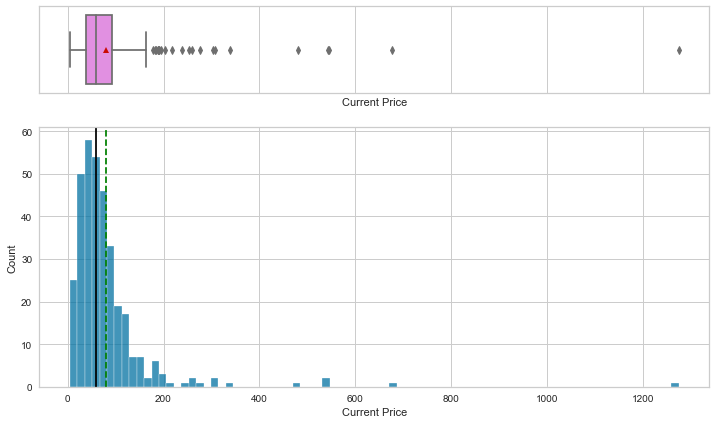

In [12]:
histogram_boxplot(df, 'Current Price')

#### Observations: 
- Current Price is right skewed with several positive outliers
- mean is 81 median is 60

**Price Change**

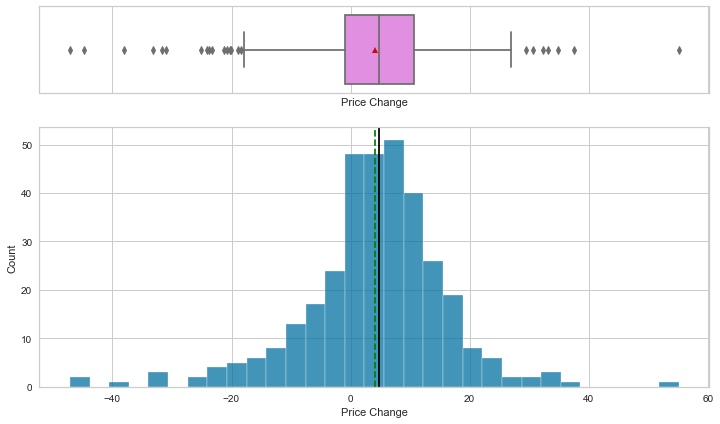

In [13]:
histogram_boxplot(df,'Price Change')  

#### Observations: 
- Price Change has negative and positive outliers
- mean is 4.1 and median 4.8

**Volatility**

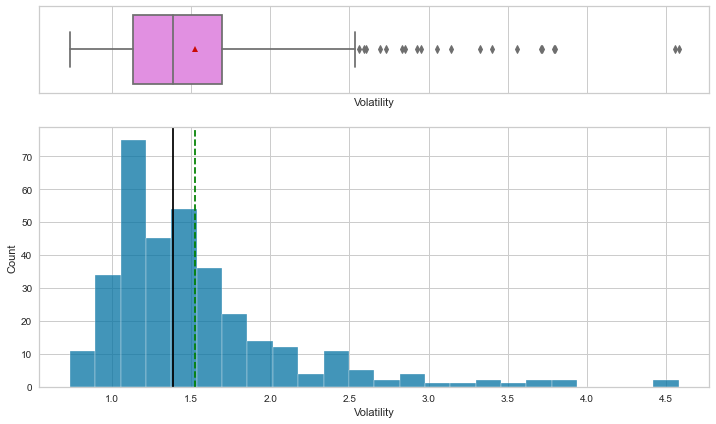

In [14]:
histogram_boxplot(df,'Volatility')

#### Observations: 
- Volatility is right skewed and have positive outliers
- mean 1.5 and median 1.4

**ROE**

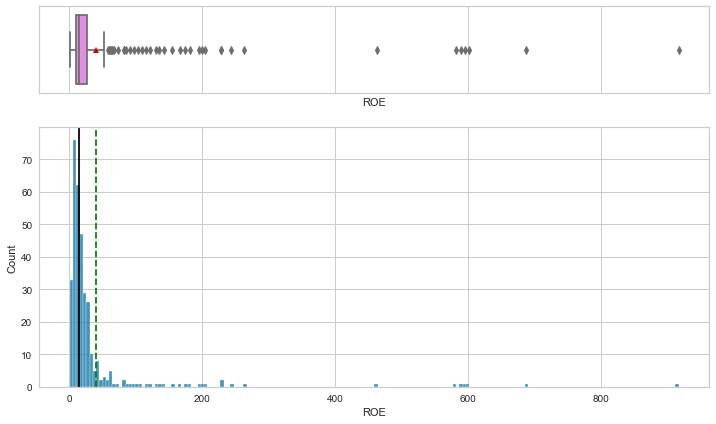

In [15]:
histogram_boxplot(df,'ROE')  

#### Observations: 
- ROE is right skewed with several positive outliers

**Cash Ratio**

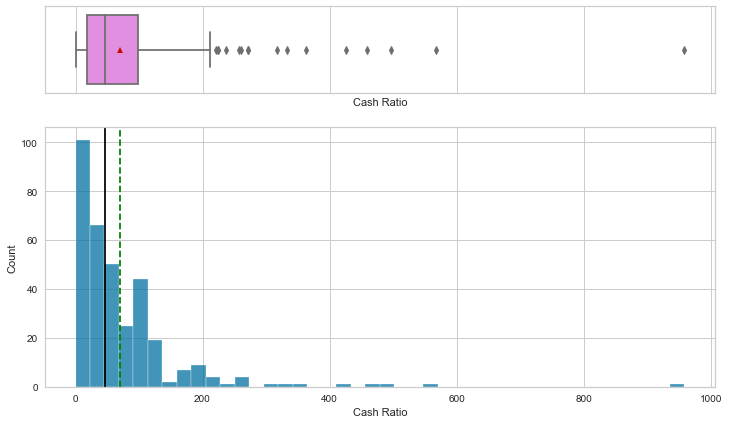

In [16]:
histogram_boxplot(df,'Cash Ratio') 

#### Observations: 
- Cash Ratio is right skewed with outliers

**Net Cash Flow**

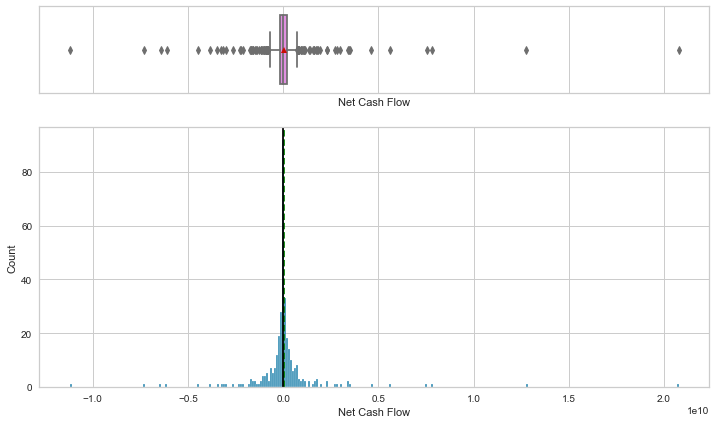

In [17]:
histogram_boxplot( df,'Net Cash Flow') 

#### Observations: 
- Net Cash Flow has several positive and negative outliers

**Net Income**

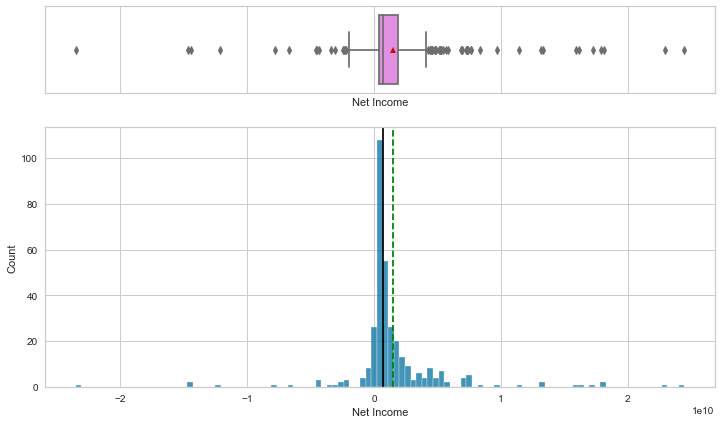

In [18]:
histogram_boxplot(df,'Net Income')  

#### Observations:
- Net Income has positive and a few negative outliers

**Earnings Per Share**

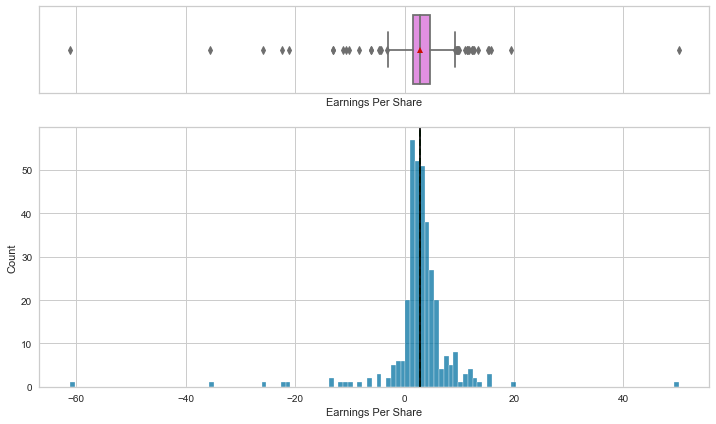

In [19]:
histogram_boxplot(df,'Earnings Per Share') 

#### Observations: 
- Earnings Per Share has positive and negative outliers

**Estimated Shares Outstanding**

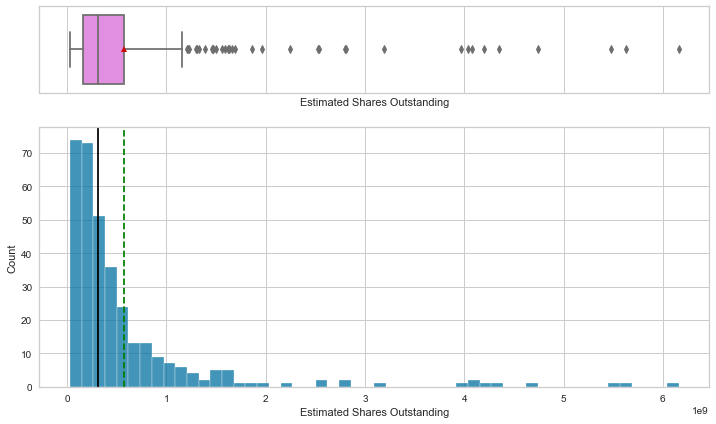

In [20]:
histogram_boxplot(df,'Estimated Shares Outstanding') 

#### Observations: 
- Estimated Shares Outstanding is right skewed with outliers

**P/E Ratio**

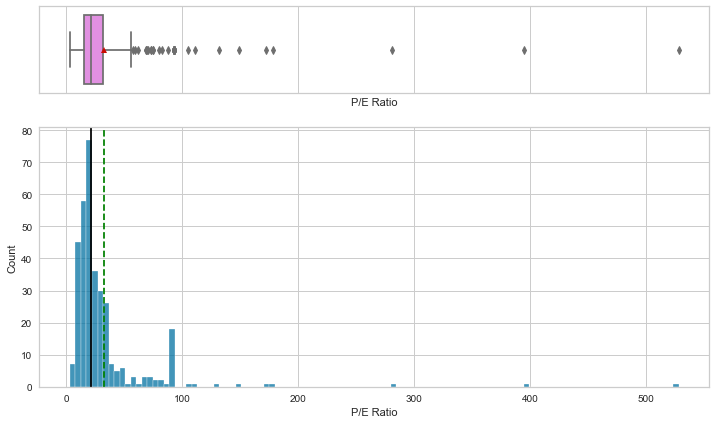

In [21]:
histogram_boxplot(df,'P/E Ratio')

#### Observations: 
- P/E Ratio is right skewed with some positive outliers

**P/B Ratio**

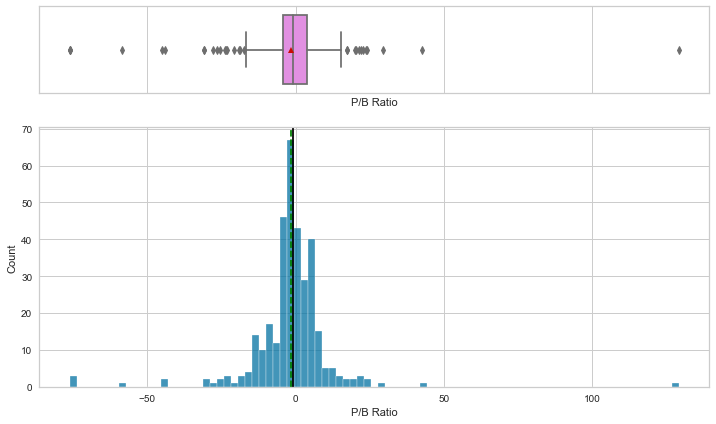

In [22]:
histogram_boxplot(df,'P/B Ratio') 

#### Observations: 
- P/B Ratio has a normal distribution with a few positive and negative outliers

In [23]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**GICS Sector**

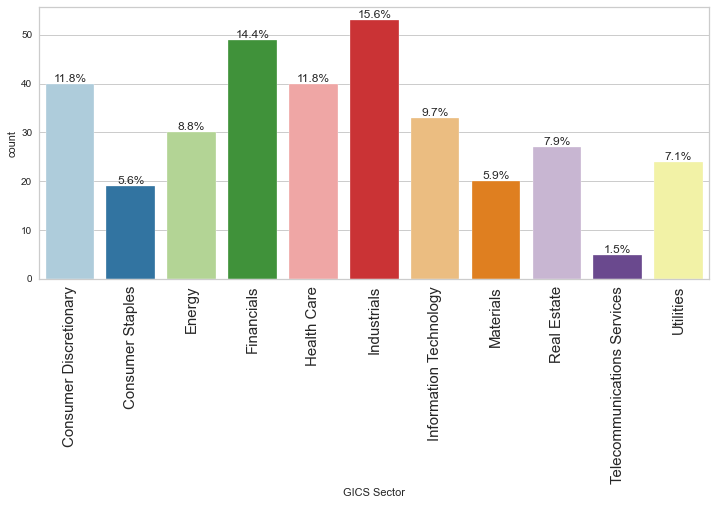

In [24]:
labeled_barplot(df, 'GICS Sector', perc=True)

#### Observations: 
- Majority of the securities belong to Industries GICS Sector(15.6%)
- Telecommunication Services  GICS Sector has less no of securities(1.5%)

**GICS Sub Industry**

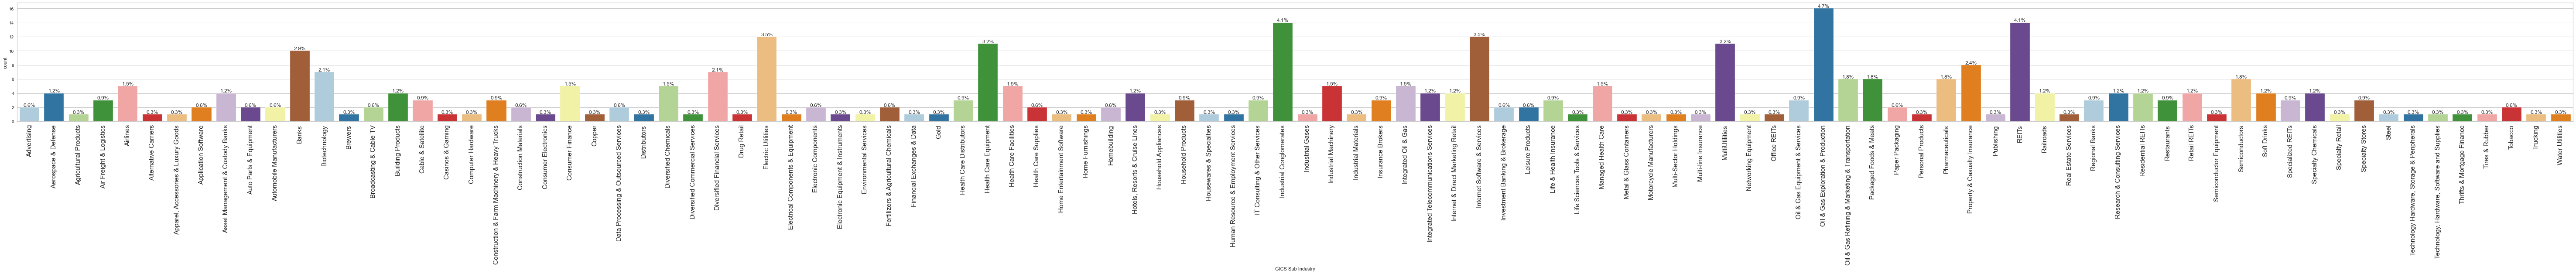

In [25]:
labeled_barplot(df, 'GICS Sub Industry',perc=True) 

#### Observations: 
- Majority of the securities belong to Oil & Gas Exploration & Production(4.7%) GICS_Sub_Industry under "Energy" GICS_Sector

## Bivariate Analysis

## Questions

**1. What does the distribution of stock prices look like?**



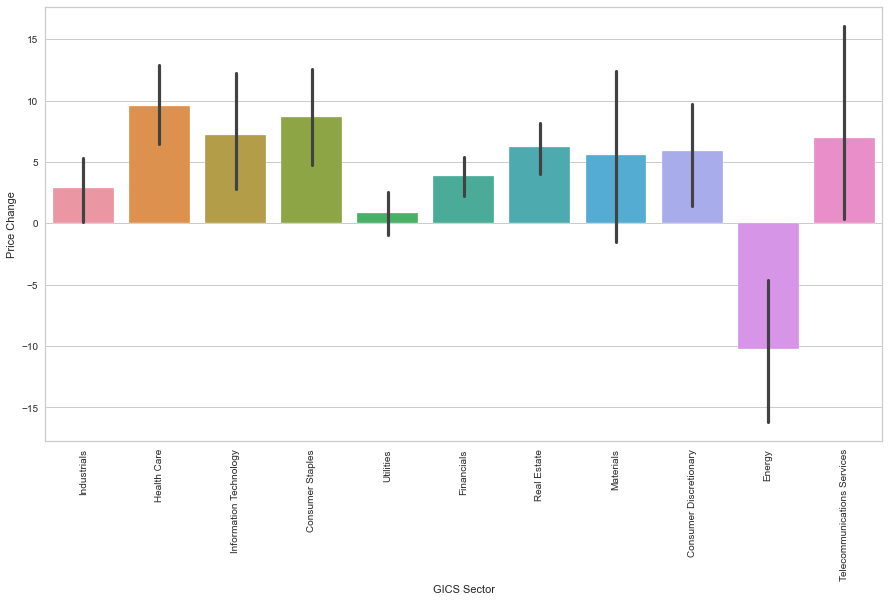

In [26]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, y="Price Change", x = "GICS Sector")  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

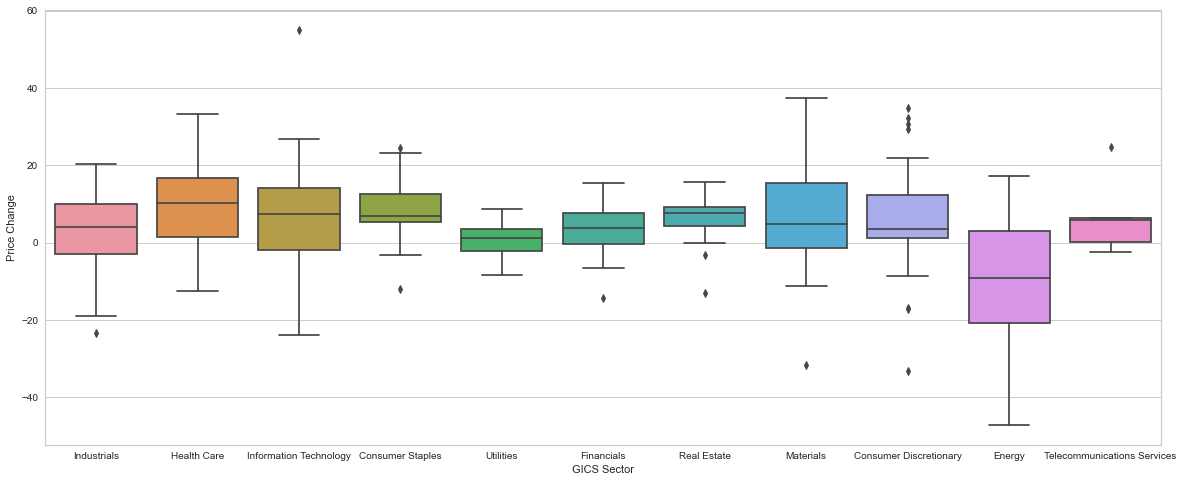

In [27]:
plt.figure(figsize=(20,8))
sns.boxplot(data = df, y = "Price Change", x = "GICS Sector");

#### Observations: 
- Energy GICS Sector has seen the maximum variation in Price Change across its securities
- Utilities GICS Sector has seen the minimum variation in Price Change across different securities 

**2. The stocks of which economic sector have seen the maximum price increase on average?**

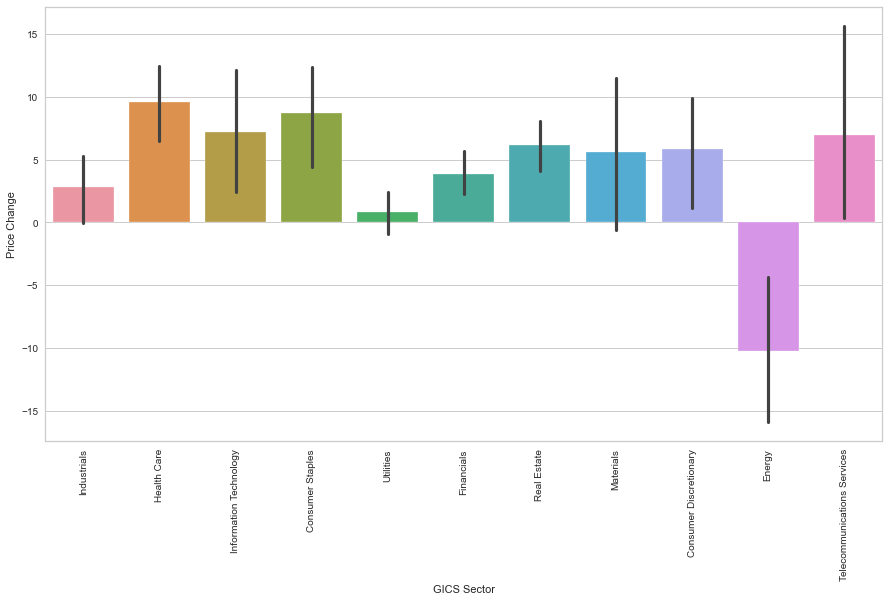

In [28]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x = "GICS Sector", y = "Price Change")  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

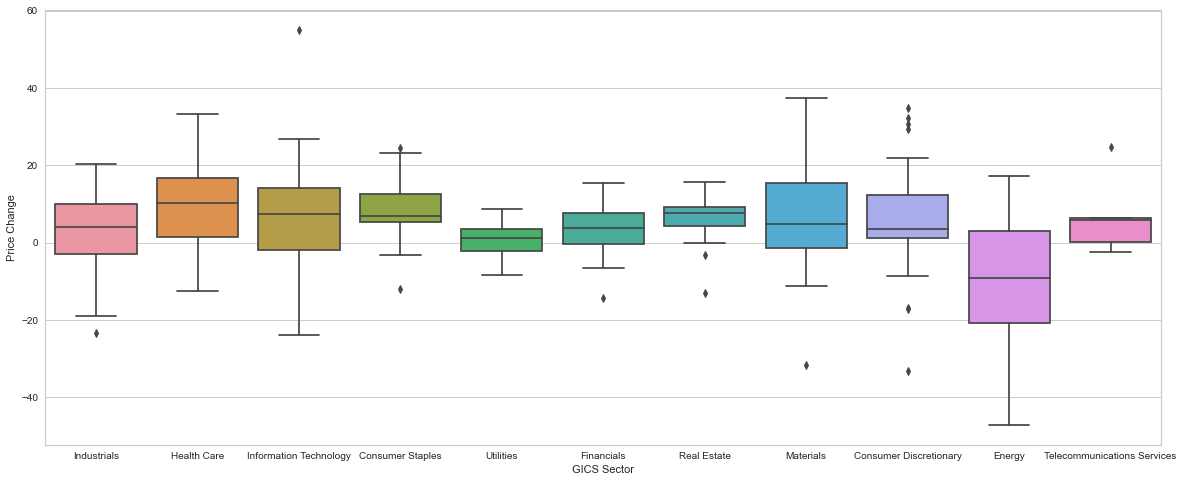

In [29]:
plt.figure(figsize=(20,8))
sns.boxplot(data = df, x = "GICS Sector", y = "Price Change");

#### Observations: 
- Real Estate has seen the minimum variation in Price Change across different securities
- Energy GICS Sector has seen the maximum variation in Price Change across its securities
- Healthcare and Information Technology also have max number of securities 

**3. How are the different variables correlated with each other?**

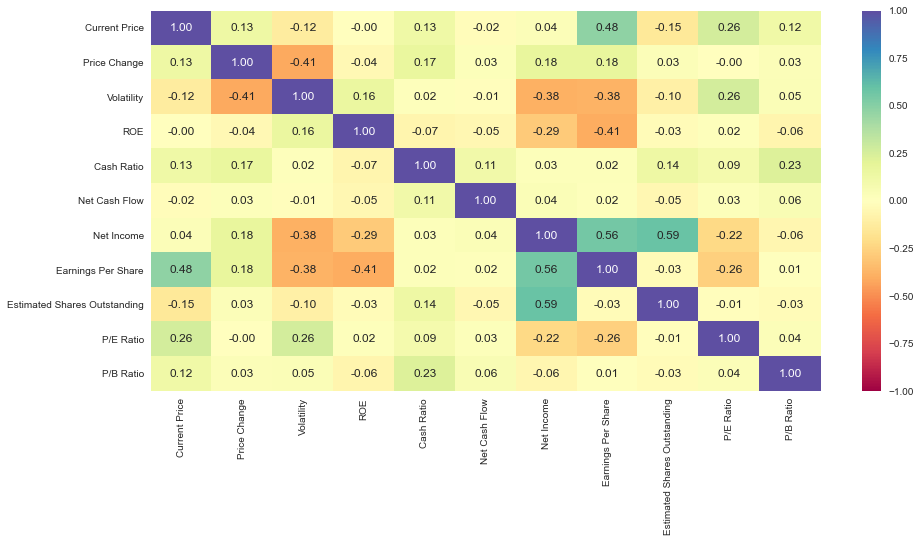

In [30]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations:
- net income and estimated shares outstanding are moderately positively correlated (.59).
- net income and earning per share are moderately positively correlated (.56).
- current price and earning per share are moderately positively correlated (.48).
- price change and volatility are negatively correlated (-0.41). more volatile the stocks, more negative price change.
- net income and volatility are negatively correlated (-0.38).
- earning per share and volatility are negatively correlated (-0.38).
- earning per share and ROE are negatively correlated (-0.41).

**4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?**

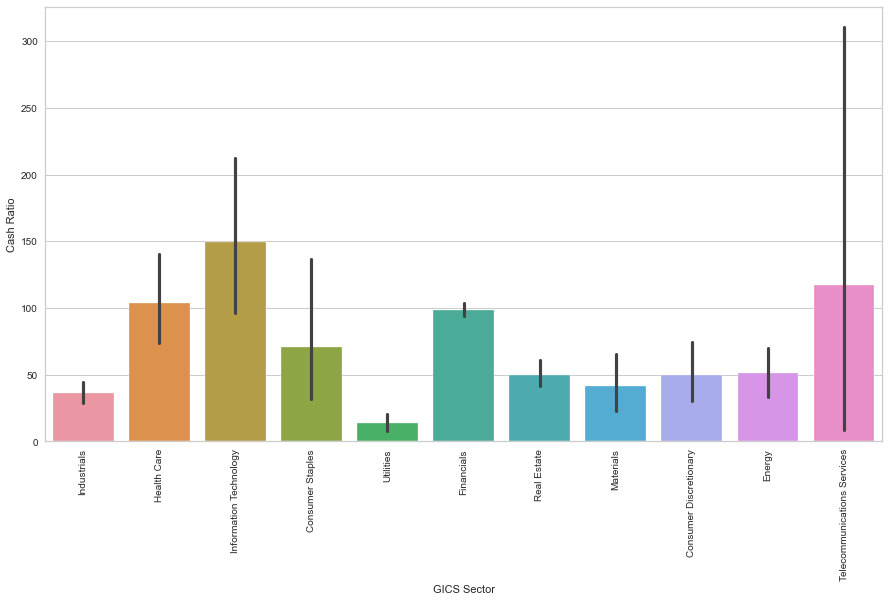

In [31]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x = "GICS Sector", y = "Cash Ratio")  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

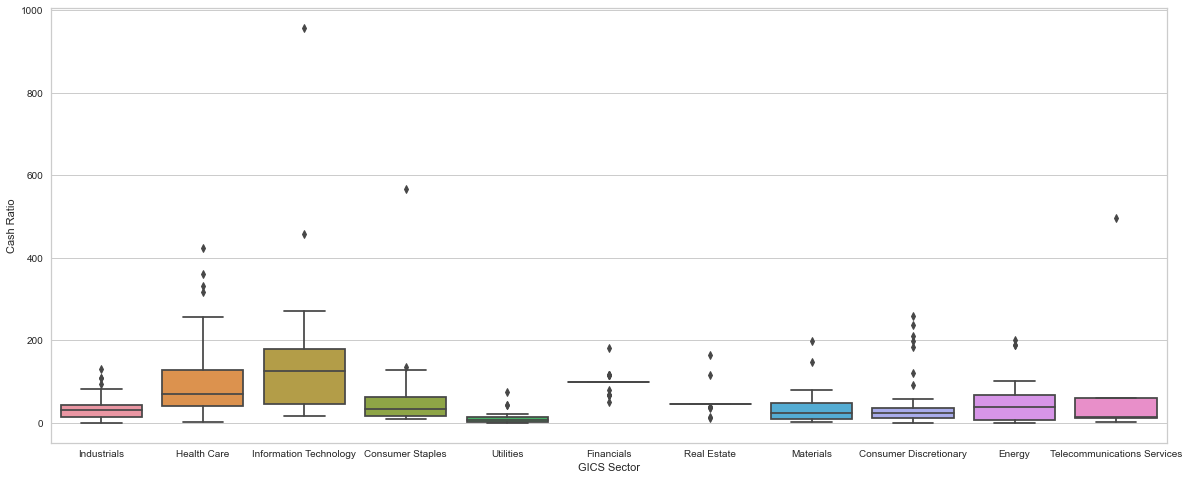

In [32]:
plt.figure(figsize=(20,8))
sns.boxplot(data = df, y = "Cash Ratio", x = "GICS Sector");

#### Observations:
- Informational Technology has some of the highest positive outliers 
- Health Care has more Cash Varance too.
- Real Estate has min Cash Ratio variance

**5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?**

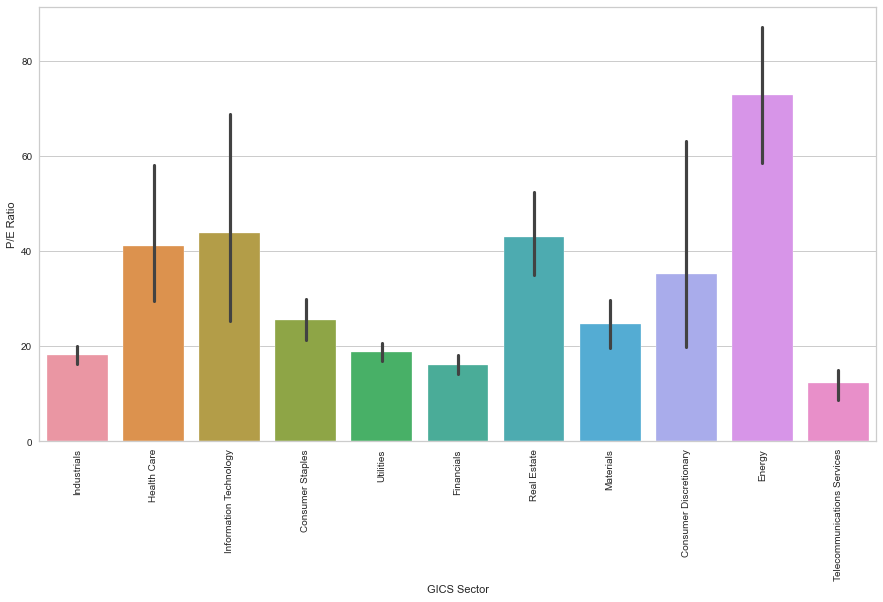

In [33]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x = "GICS Sector", y = "P/E Ratio")  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

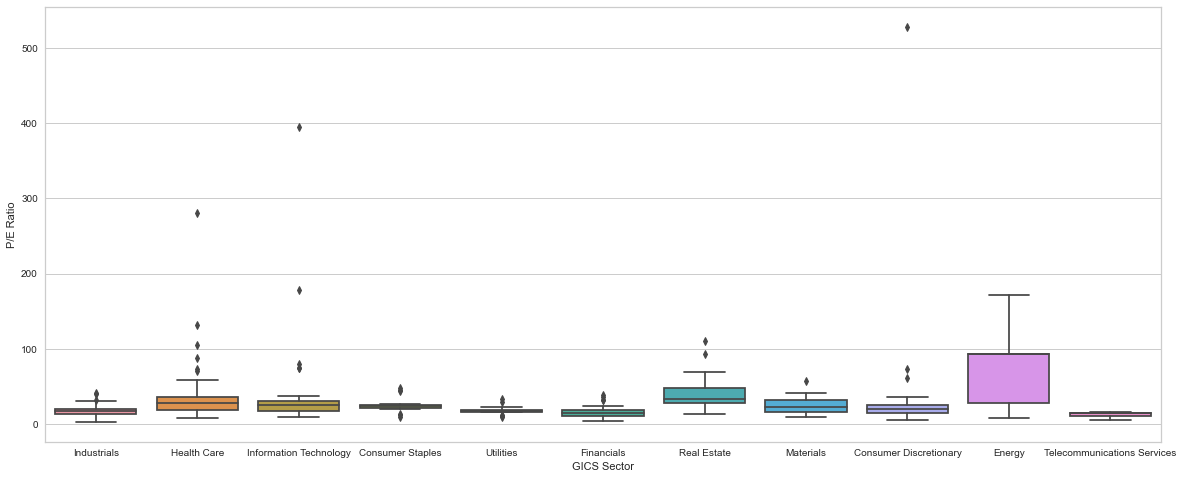

In [34]:
plt.figure(figsize=(20,8))
sns.boxplot(data = df, y = "P/E Ratio", x = "GICS Sector");

#### Observations:
- Energy GICS Sector has some of the highest variance in P/E ratios
- Investors like to buy shares from energy sectors.

**GICS Sector vs Volatility**

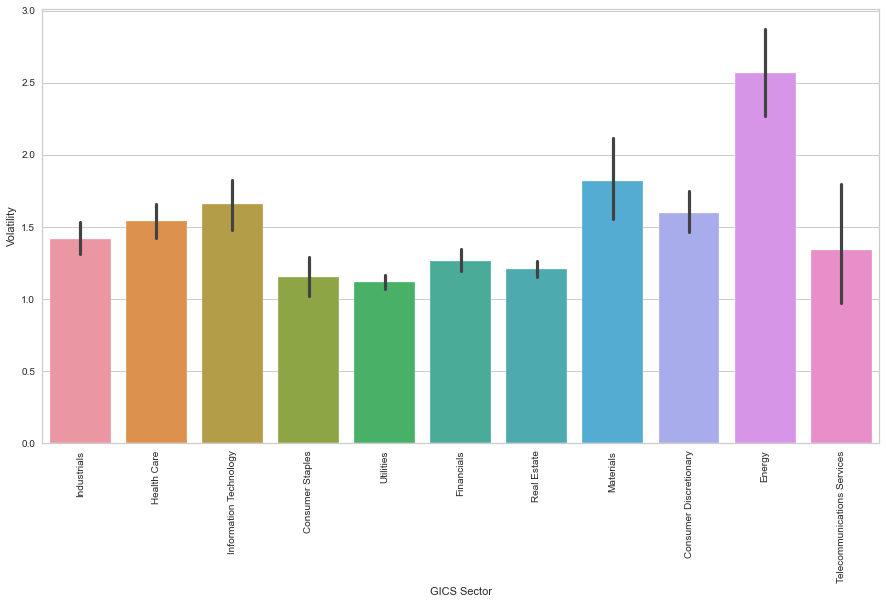

In [35]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x = "GICS Sector", y = "Volatility")  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

#### Observations:
- Energy GICS Sector has highest volatility.


# Pair-plot analysis

In [36]:
# selecting numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

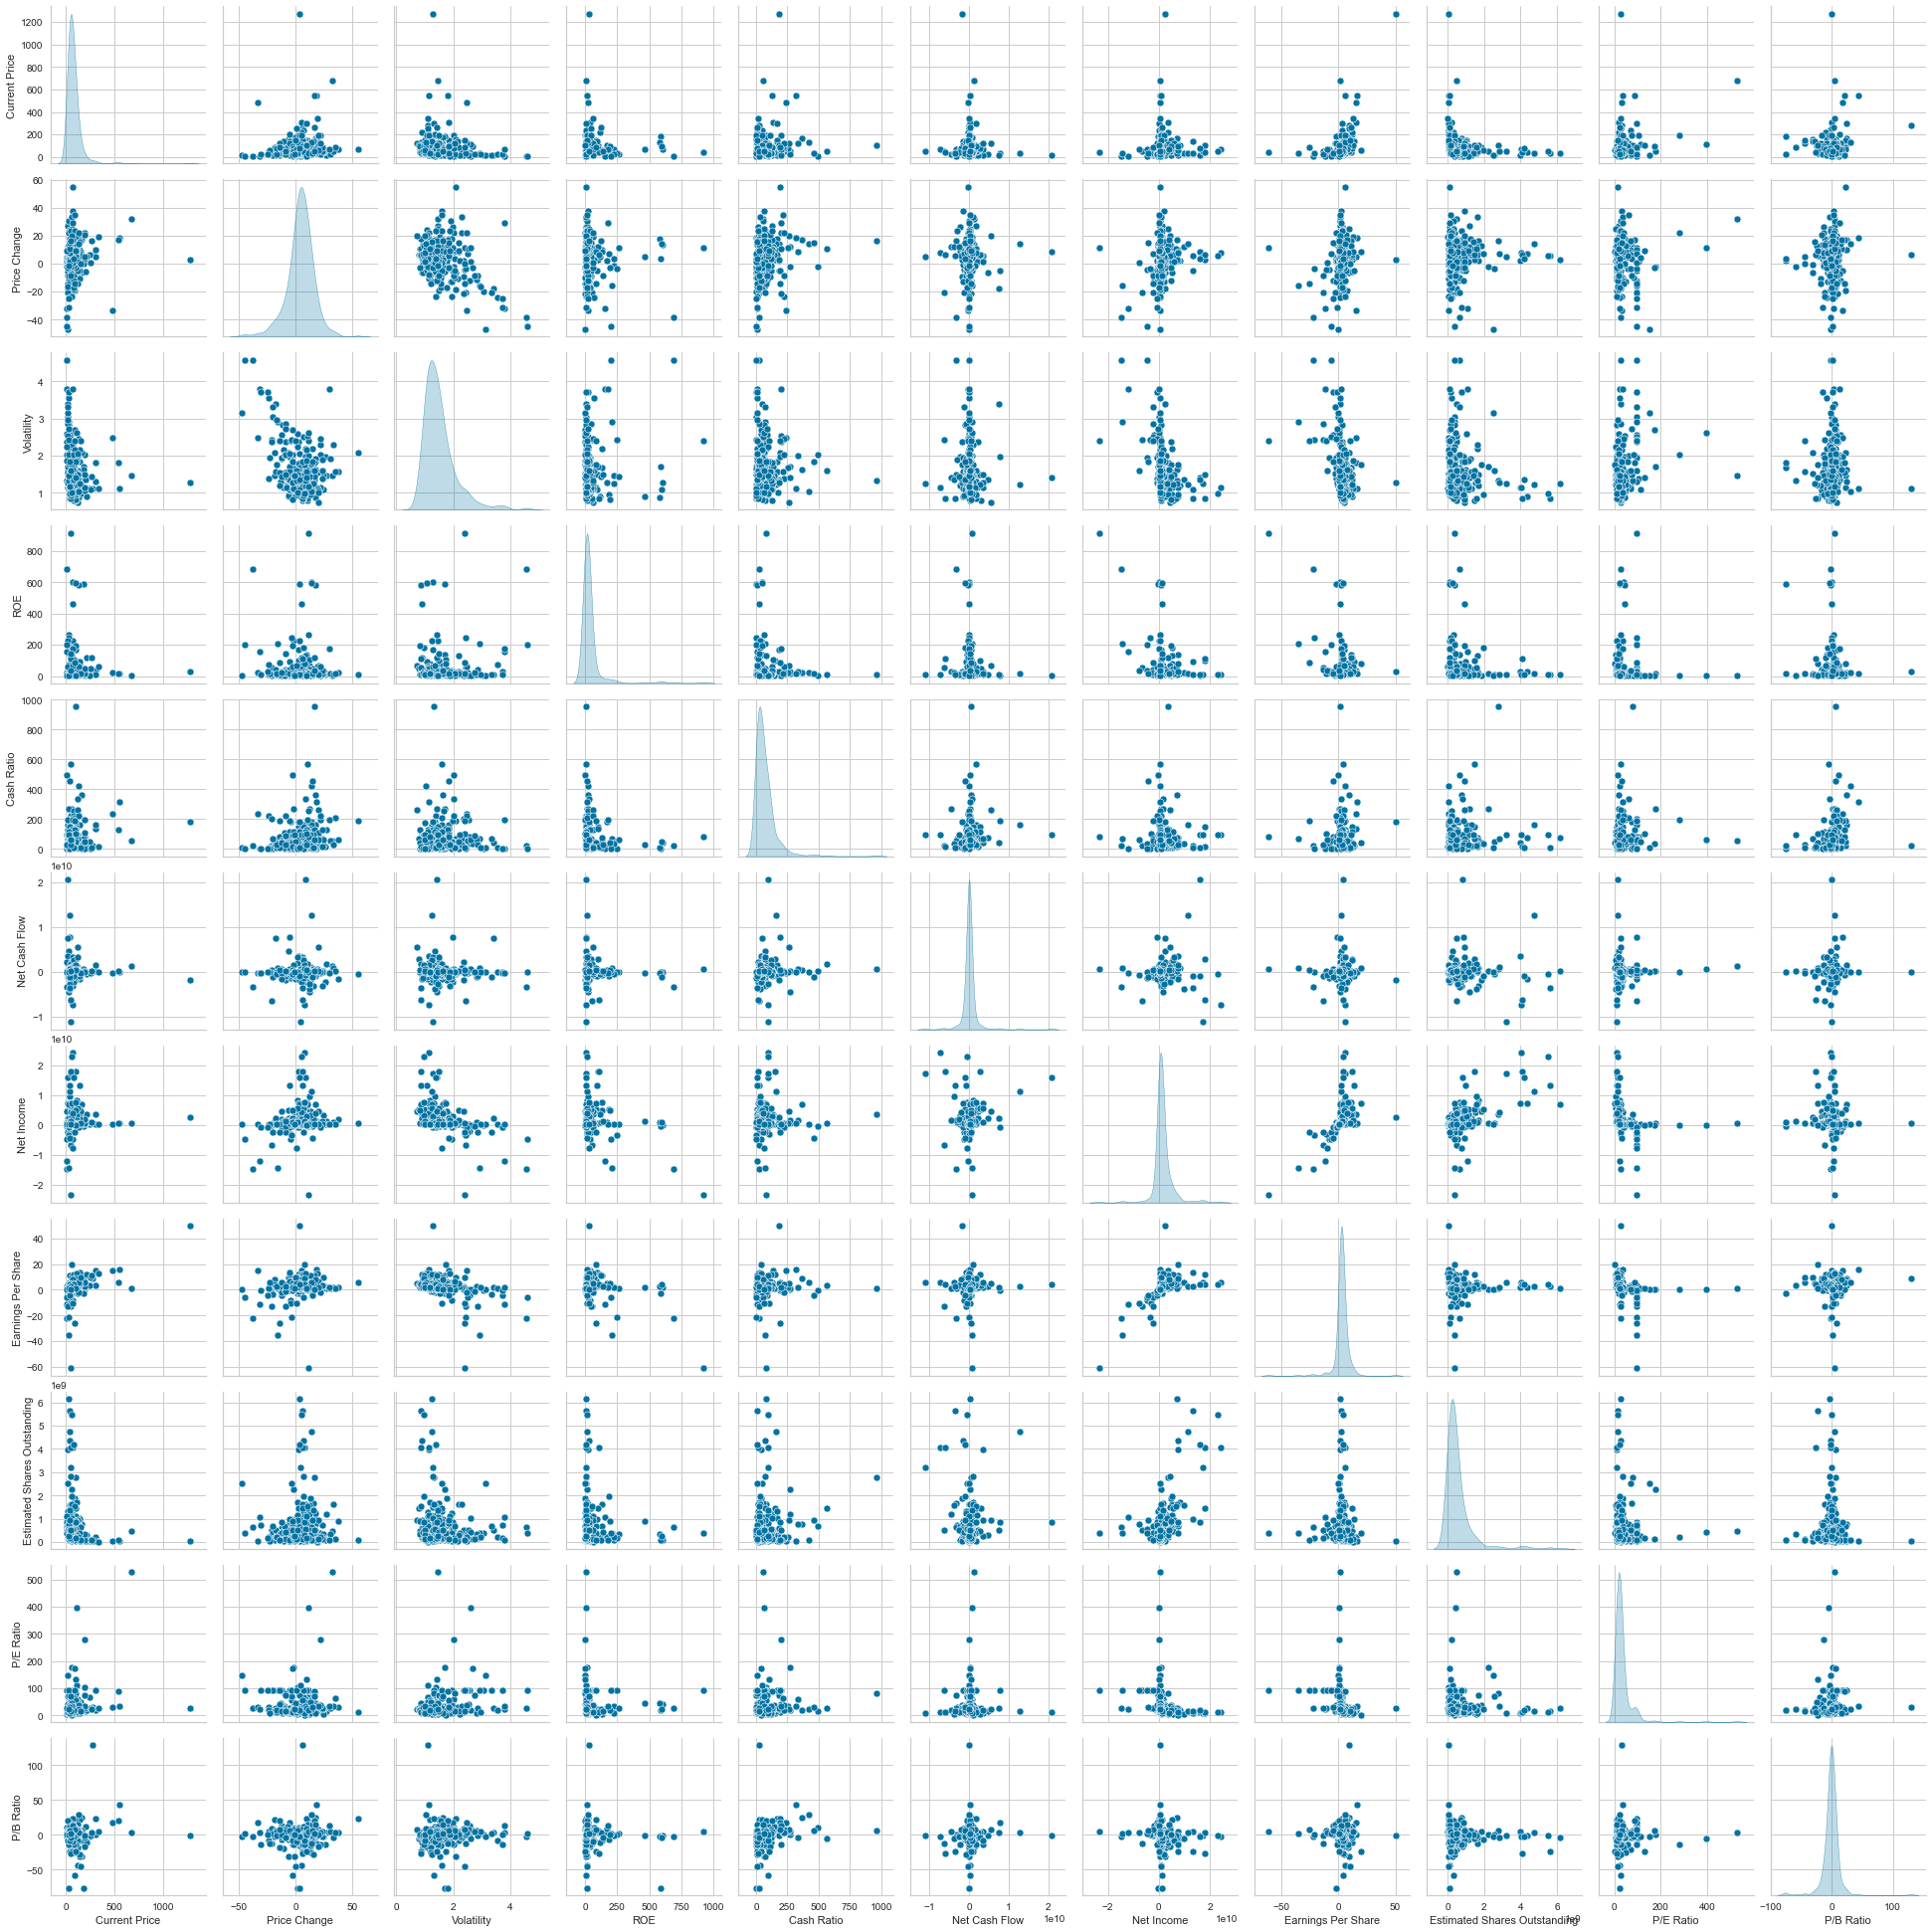

In [37]:


sns.pairplot(df[num_cols],diag_kind="kde");


 #### Observations:
- Price Change, Net Cash Flow,P/B Ratio, Exchang Per Share, Net Income, have normal distribution.
- P/E_Ratio is bimodal.
- Volatility is trimodal.


## Observations based on EDA 

- The dataset has 340 rows and 15 columns
- The datatypes of the different columns in the dataset are int(4 nos), float(7 nos), object(4 nos).
- There is no missing values or duplicate records  and Memory usage is 40.0+KB.
- There are 11 unique GICS_Sector, 104 unique GICS_Sub_Industry.
- Oil & Gas Exploration & Production is the most common in GICS Sub Industry
- Average Current_Price is 80.86 dollars which indicates right skewed and have high outliers, Average Price_Change is 4.078 dollars, Average Volatility is 1.5
- Median Price_Change is 4.819505. Median Volatility 1.385593
- Average ROE is 39.597 and median ROE is 15 which indicates right skewedand have outliers. The average Cash ratio is 70.2 and median is 47
- Average Net_Cash_Flow is 55537620 dollars and median Net_Cash_Flow is 2098000.0 dollars which indicates right skewed, high outliers.
- Average Net_Income is 1494384602.941176 dollars and median Net_Income is 707336000.0 dollars which indicates right skewed with high outliers
- Average Earnings_Per_Share is 2.77 and median is 2.895. Average Estimated_Shares_Outstanding is 577028337.754029 and median is 309675137.8 indicates right skewed and have outliers.
- Average P/E is 32.61, median values is 20.8. Average P/B is -1.7 while median values is -1.06
- Current Price,Volatility,ROE,Cash Ratio,Estimated Shares Outstanding is right skewed with several positive outliers
- Price Change has negative and positive outliers.
- Net Cash Flow,Net Income,Earnings Per Share has several positive and negative outliers

- P/E Ratio is right skewed with some positive outliers
- P/B Ratio has a normal distribution with a few positive and negative outliers
- Majority of the securities belong to Industries GICS Sector(15.6%)
- Telecommunication Services GICS Sector has less no of securities(1.5%)
- Majority of the securities belong to Oil & Gas Exploration & Production(4.7%) 
- Energy GICS Sector has seen the maximum variation in Price Change across its securities
- Utilities GICS Sector has seen the minimum variation in Price Change across different securities
- Real Estate has seen the minimum variation in Price Change across different securities so safe for investors

- Informational Technology has some of the highest positive outliers
- Health Care has more Cash Vairance too making them favorable to investors

- Energy GICS Sector has some of the highest variance in P/E ratios being more volatile and riskier for investors.


In [38]:
df[num_cols]

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810
...,...,...,...,...,...,...,...,...,...,...,...
335,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,9.394573e+08,28.976191,6.261775
336,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
337,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,1.884615e+08,131.525636,-23.884449
338,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,2.578925e+08,22.749999,-0.063096


# Data Preprocessing

## Duplicate value check


In [39]:
# lets check duplicate observations
df.duplicated().sum()

0

 #### Observations:
 - There are no duplicate records in the dataset

## Missing value treatment


In [40]:
# lets check total null values 
df.isnull().sum().sum()

0

 #### Observations:
 - There are no null or missing values in the dataset

## Outlier Check

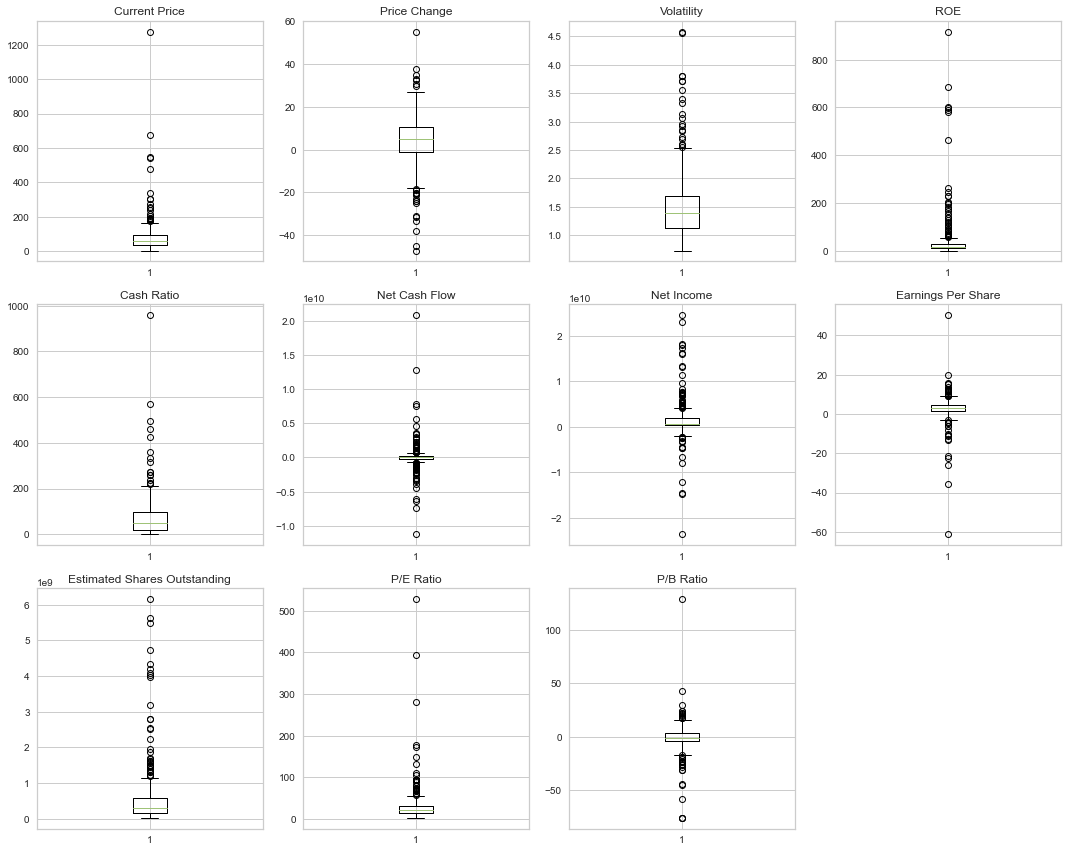

In [41]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Feature Engineering: Scaling

In [42]:
# scaling the data before clustering
scaler = StandardScaler()
# Code to scale the data
subset_scaled_df = pd.DataFrame(
    scaler.fit_transform(df.drop([ "Security","GICS Sector", "GICS Sub Industry"],axis=1)),
    columns=df.drop(["Security", "GICS Sector", "GICS Sub Industry"],axis=1).columns,
) 
subset_scaled_df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


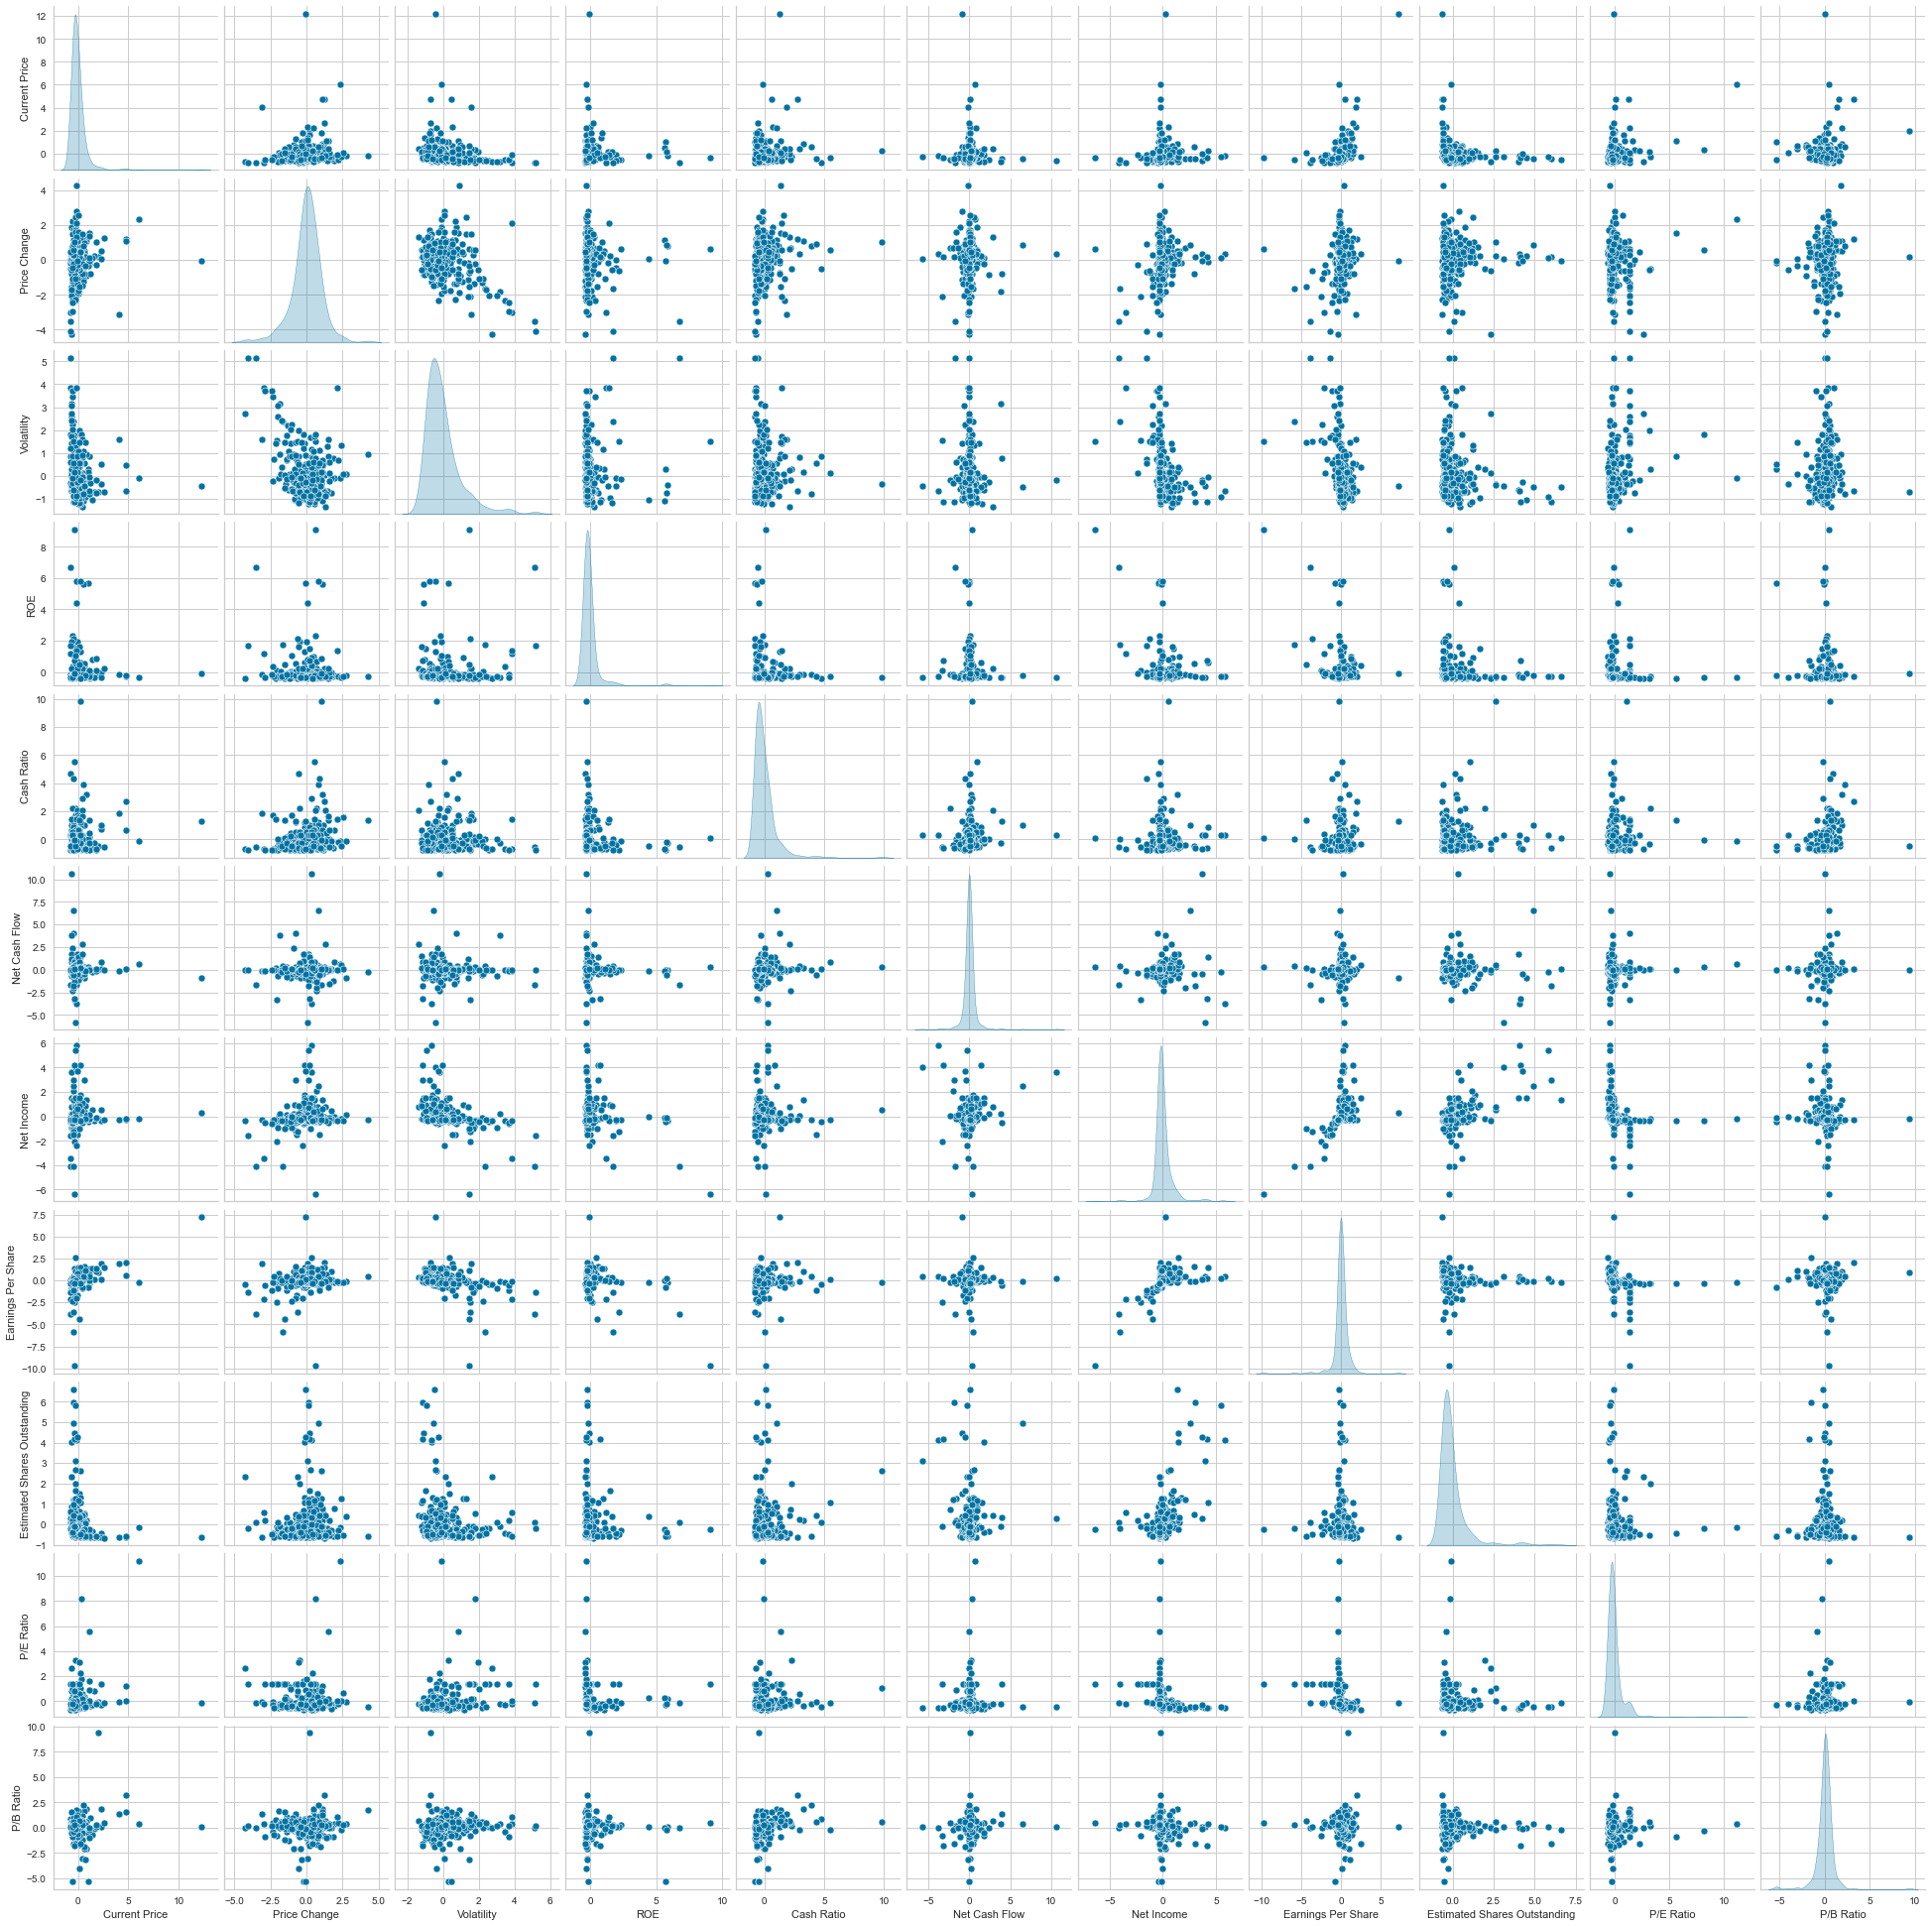

In [43]:
# Pair-plot analysis

sns.pairplot(subset_scaled_df ,diag_kind="kde");

 #### Observations:
- After scaling attributes have average of 0, standard deviation of 1
- No missing values
- There is outliers that is not treated

## K-means Clustering

In [44]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068


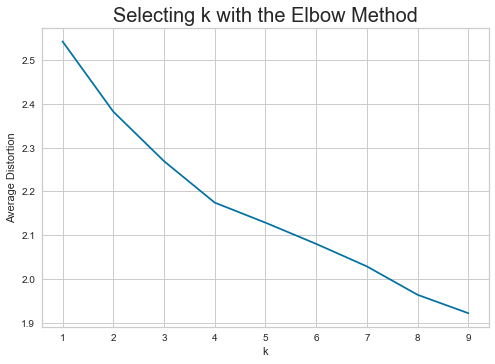

In [45]:
clusters = range(1, 10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

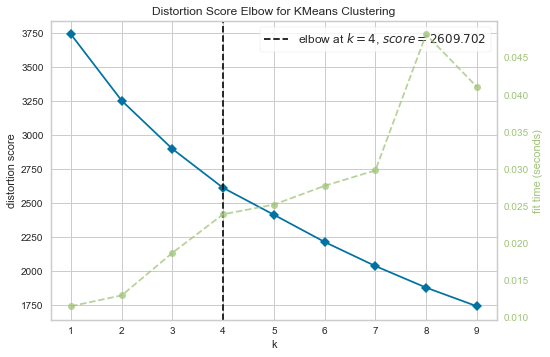

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 10), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

**Observations:**
- The appropriate value of k from the elbow curve seems to be 4,5 or 6

## Checking Silhoutte Score

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779403)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.40054227372136175)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)


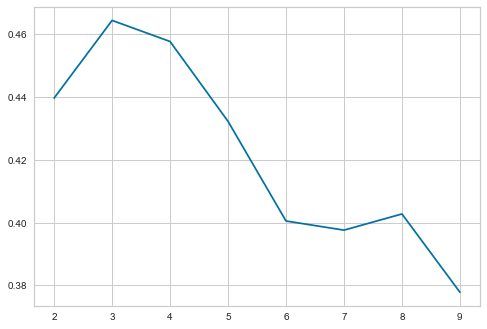

In [47]:
sil_score = []
cluster_list = range(2, 10)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

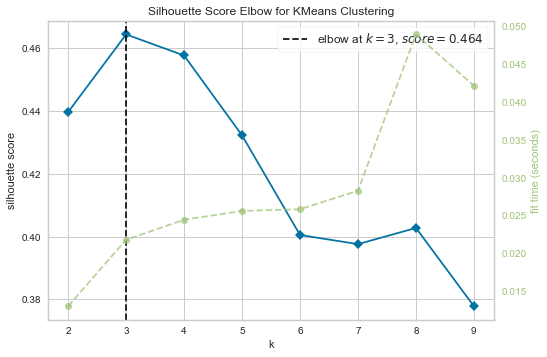

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [48]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 10), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

**Observations:**
- Silhouette score shows that  4 is a good number of clusters

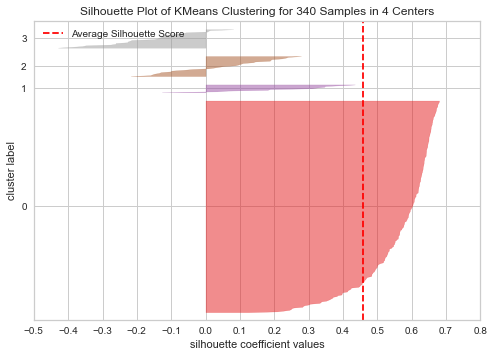

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [49]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

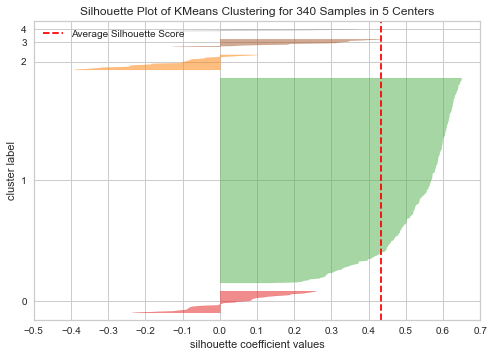

In [50]:
visualizer = SilhouetteVisualizer(KMeans(5, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show();

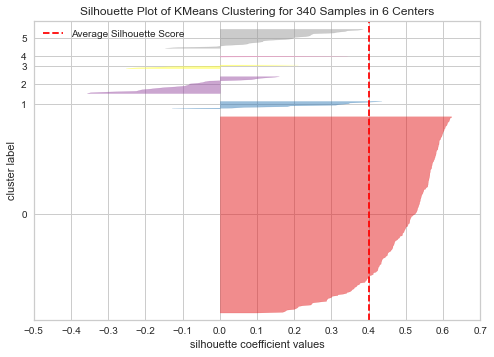

In [51]:
visualizer = SilhouetteVisualizer(KMeans(6, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show();

### Let's take 4 as the appropriate no. of clusters as the silhouette score is high

In [52]:
# final K-means model
##  code to choose the number of clusters
kmeans = KMeans(n_clusters=4, random_state=1)  
kmeans.fit(k_means_df)

KMeans(n_clusters=4, random_state=1)

In [53]:
# creating a copy of the original data
df1 = df.copy()

In [54]:
# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

## Cluster Profiles

In [55]:
km_cluster_profile= df1.groupby("KM_segments").mean()

In [56]:
km_cluster_profile['count_in_each_segments'] = df1.groupby("KM_segments")['Security'].count().values

In [57]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
KM_segments,,,,,,,,,,,,
0,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
3,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25


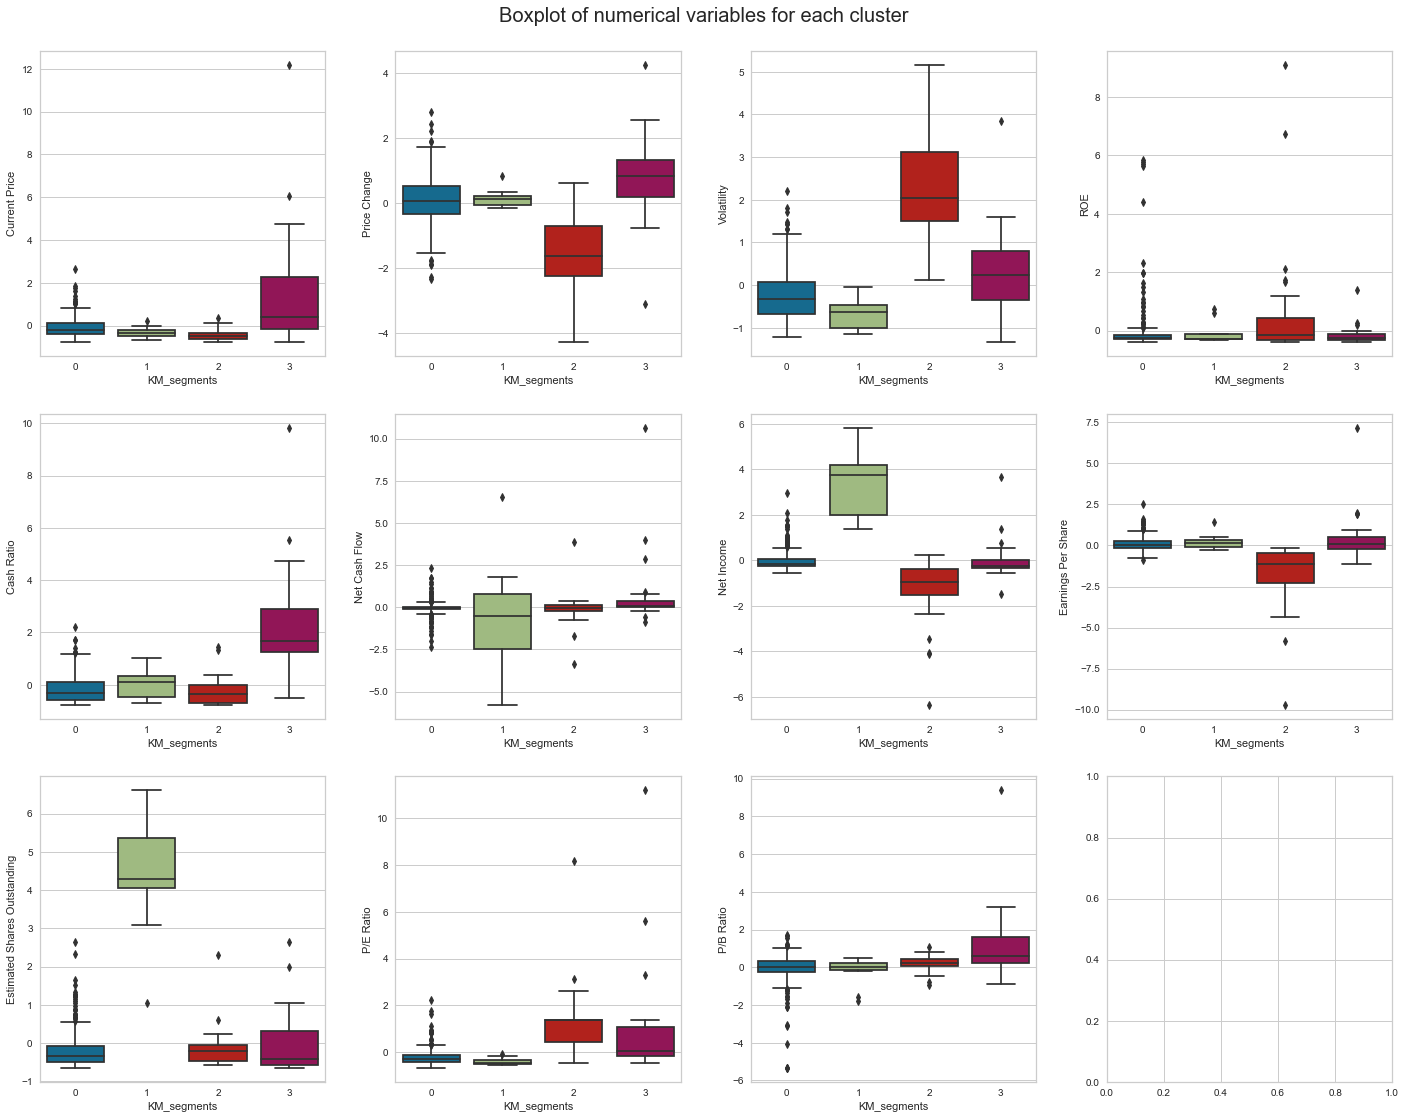

In [58]:
fig, axes = plt.subplots(3, 4,  figsize=(20, 16))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(3):
    for jj in range(4):
        if counter <11:
            sns.boxplot(ax=axes[ii, jj],y=k_means_df[num_cols[counter]],x=k_means_df["KM_segments"])
        counter = counter+1

fig.tight_layout(pad=2.0)

<AxesSubplot:xlabel='KM_segments'>

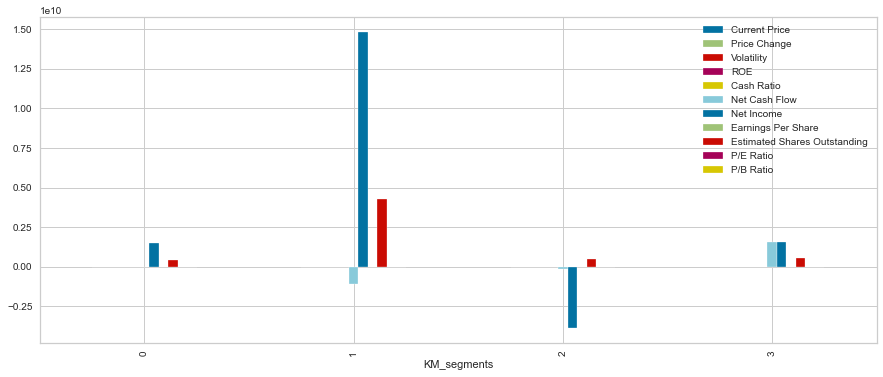

In [59]:
df1.groupby("KM_segments").mean().plot.bar(figsize=(15, 6))

## Observations

#### Cluster 0
- There is 277 different securities, ie max shares
- Average Current Price of 72 dollars 
- Cash Ratio of 53
- Earnings per share of 3.62
- P/B Ratio of -3.35
- shows intermediate volatility

#### Cluster 1
- There is 11 different securities,which is the lowest
- Average Current Price of 50.51 dollars 
- Cash Ratio of 75.9
- Earnings per share of 4.15
- P/B Ratio of -4.55

#### Cluster 2
- There is 27 different securities
- Average Current Price of 38.099 dollars , which is the lowest
- Cash Ratio of 50.03
- Earnings per share of -9.43, which is very low
- P/B Ratio of 1.34
- has Highest estimated share outstanding 480398572
- volatility is high 2.91

#### Cluster 3
- There is 25 different securities
- Average Current_Price of 234.17 dollars which is very high.
- Cash Ratio of 277.64, which is the highest
- Earnings per share of 6.04, which is high compared to other clusters
- P/B Ratio of 14.4, which is high
- Has highest income 1572611680.000000

**Observations:**
- Cluster 0 is safer, has containing more exclusive securities

- Cluster 0 and 1 has better performance

- Cluster 3 and 2 is not safe

In [60]:
## Code to print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castl

In [61]:
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          6
             Financials                     45
             Health Care                    29
             Industrials                    52
             Information Technology         24
             Materials                      19
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
1            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     2
             Information Technology          1
             Telecommunications Services     2
2            Energy                         22
             Industrials                     1
             Inform

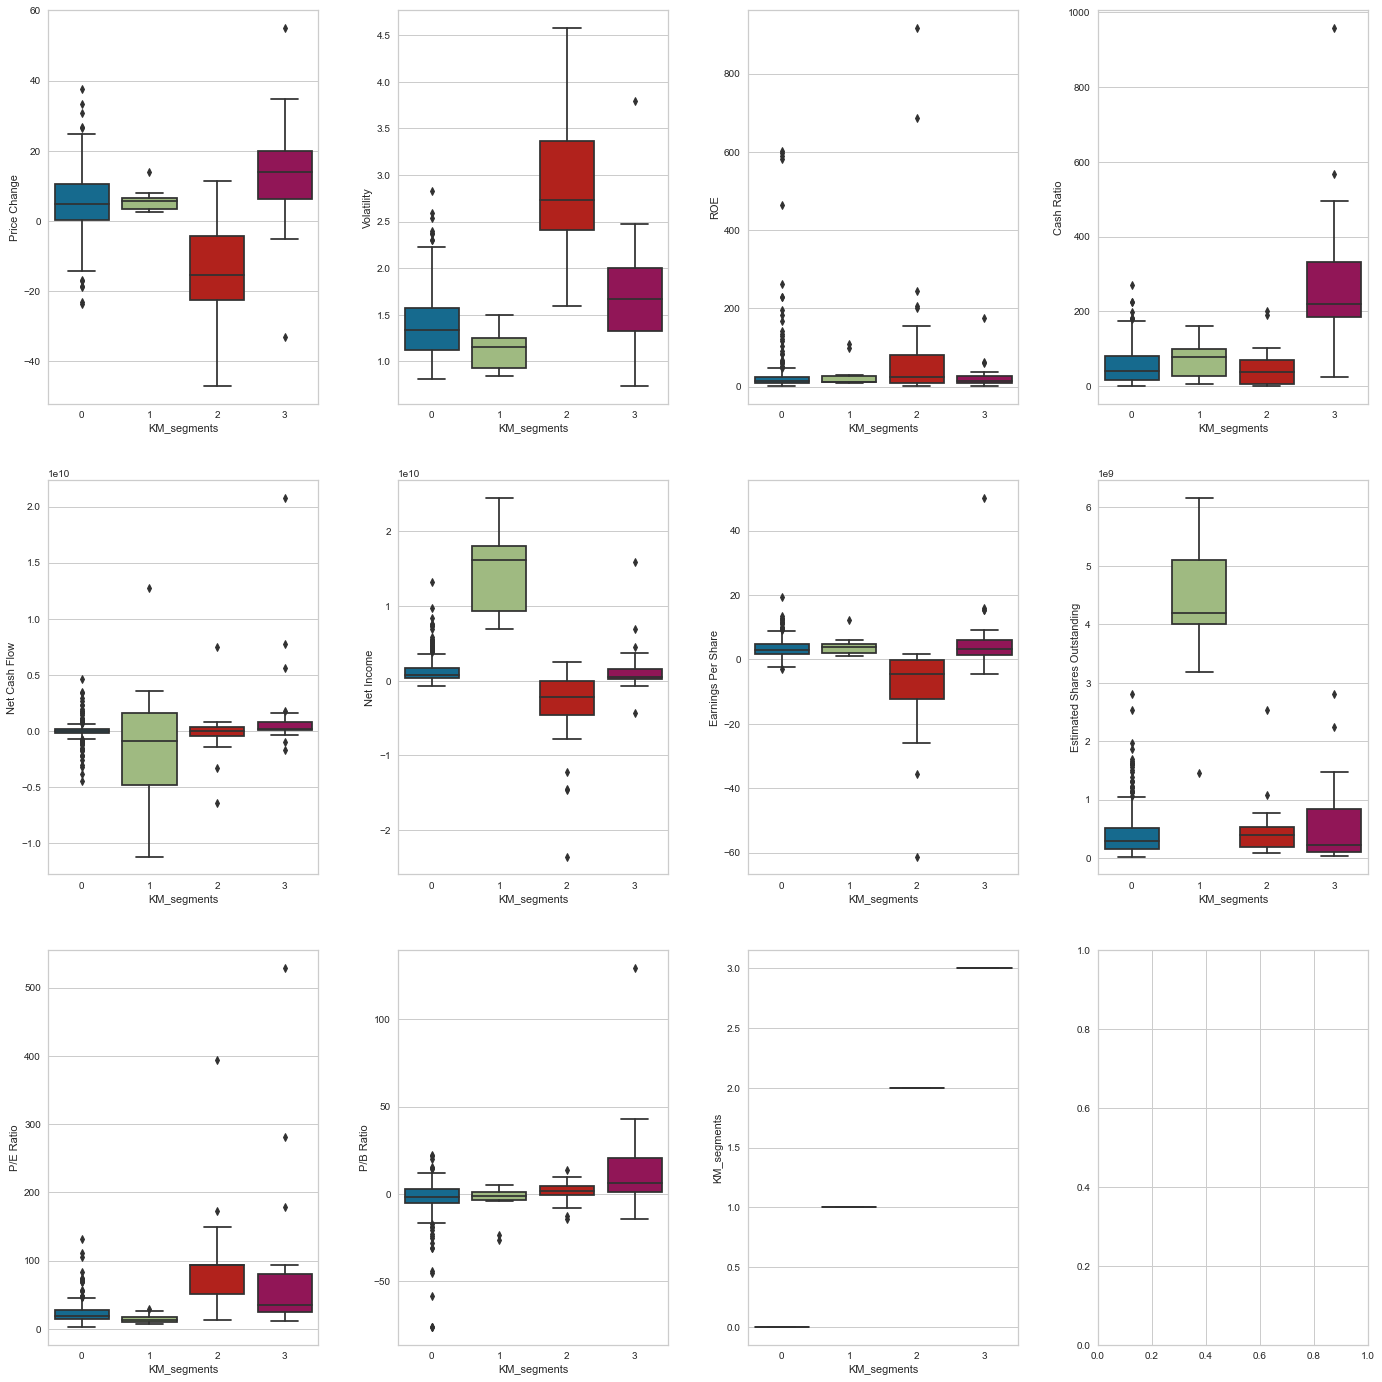

In [62]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df1,
                y=df1.columns[4+counter],
                x="KM_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

## Hierarchical Clustering

In [63]:
hc_df = subset_scaled_df.copy()

In [64]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"] ## Complete the code to add distance metrics

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"] ## Complete the code to add linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850004.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159737.
Cophenetic correl

## Different linkage methods with Euclidean distance only.

In [65]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] ## Complete the code to add linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm
        
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)


Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


**Observations**
- Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.
- We see that the cophenetic correlation is maximum with average linkage 

## Dendrograms for the different linkage methods

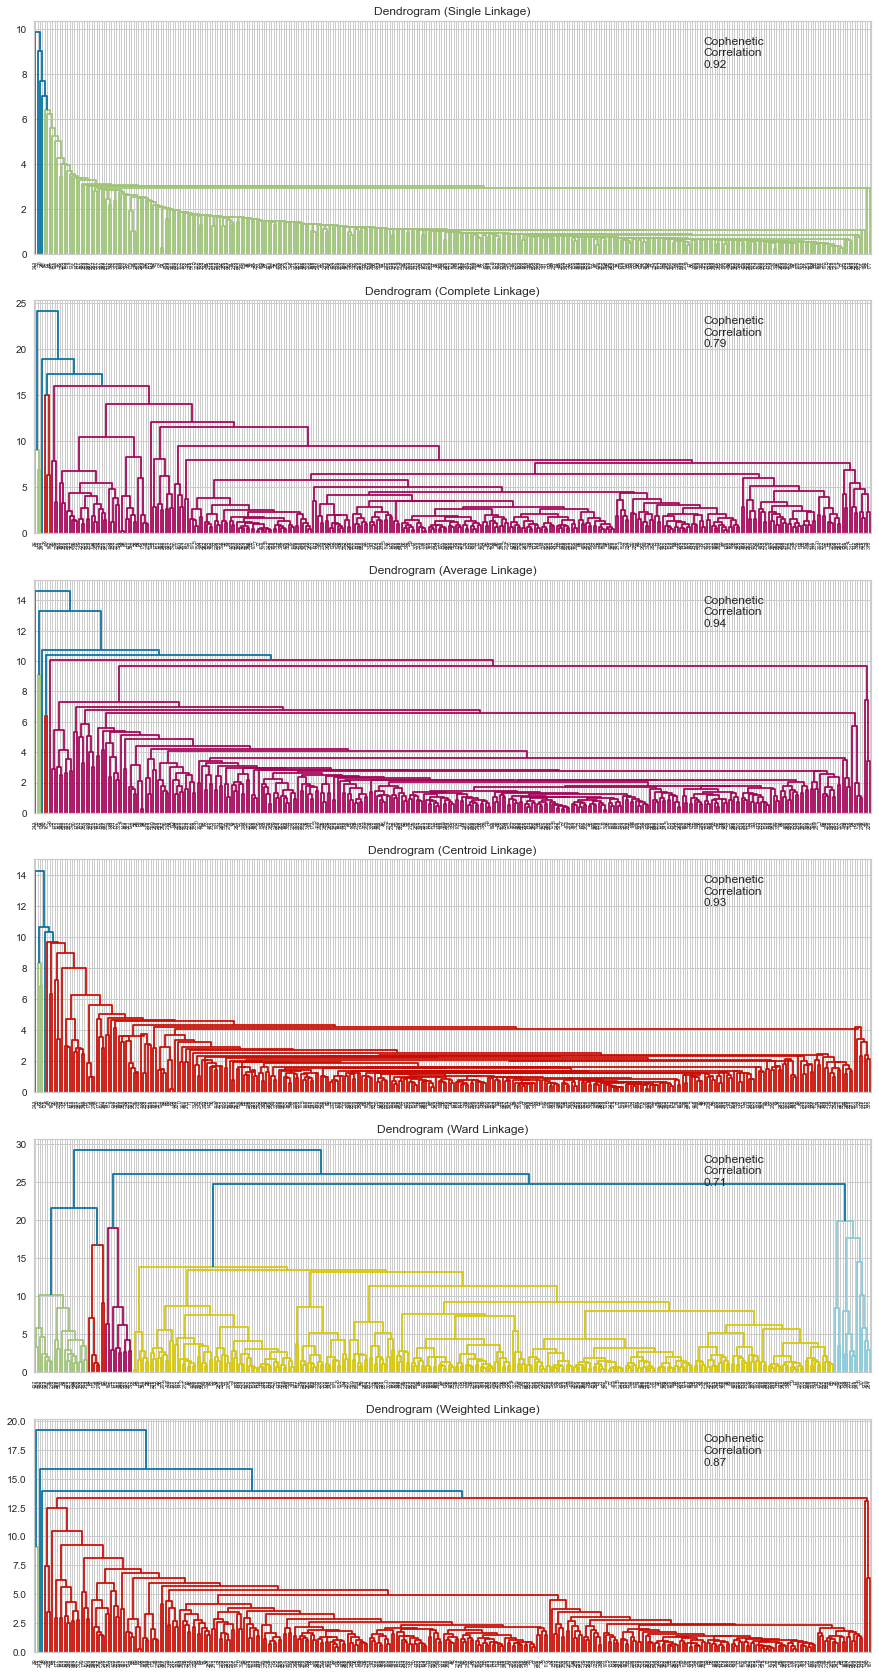

In [66]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] ## Complete the code to add linkages

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])



In [67]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.710118
1,complete,0.787328
5,weighted,0.869378
0,single,0.923227
3,centroid,0.931401
2,average,0.942254


**Observations:**
- The cophenetic correlation is highest for average (0.94) and centroid linkage methods (0.93).
- We will move ahead with average linkage.
- 6 appears to be the appropriate number of clusters from the dendrogram for average linkage.

In [68]:
## code to define the hierarchical clustering model
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="average")  
HCmodel.fit(hc_df)

AgglomerativeClustering(linkage='average', n_clusters=6)

In [69]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [70]:
 ## code to groupby the cluster labels
hc_cluster_profile = df2.groupby("HC_segments").mean() 


In [71]:
#code to groupby the cluster labels
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values)

In [72]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,77.287589,4.099730,1.518066,35.336336,66.900901,-33197321.321321,1538074666.666667,2.885270,560505037.293543,32.441706,-2.174921,333
1,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,1
4,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
5,276.570007,6.189286,1.116976,30.000000,25.000000,90885000.000000,596541000.000000,8.910000,66951851.850000,31.040405,129.064585,1


In [73]:
## Complete the code to print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Alexion Pharmaceuticals' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Amgen Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.'
 'Aon plc' 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball 

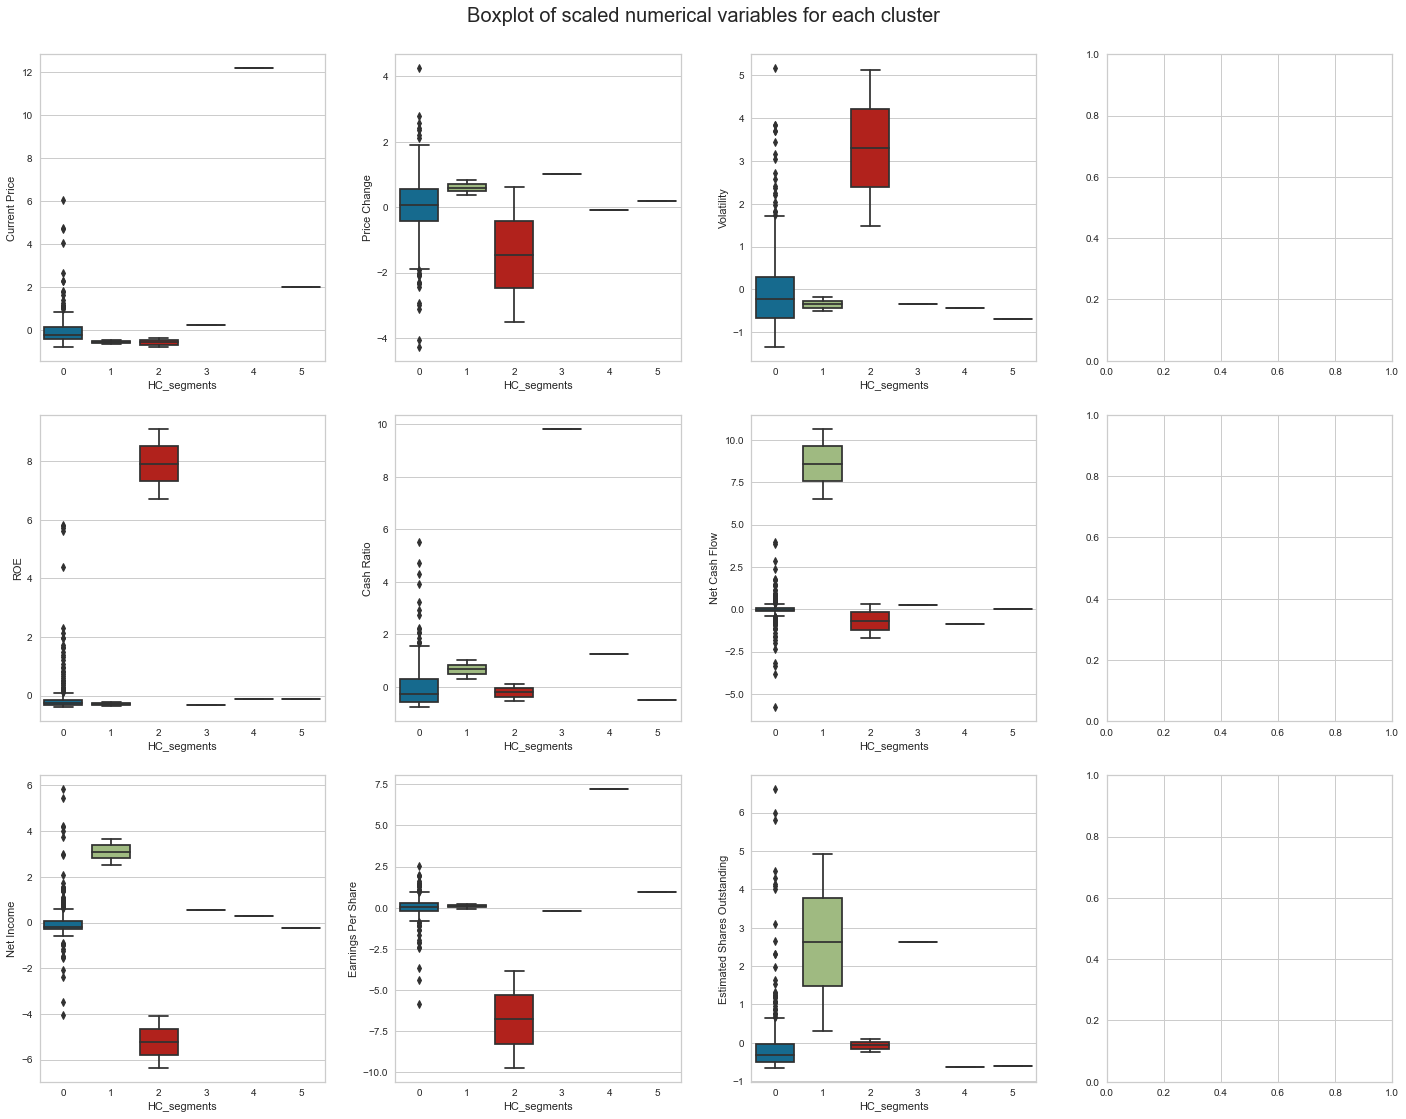

In [74]:
fig, axes = plt.subplots(3, 4, figsize=(20, 16))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(3):
    sns.boxplot(
        ax=axes[ii][0],
        y=hc_df[num_cols[counter]],
        x=hc_df["HC_segments"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][1],
        y=hc_df[num_cols[counter]],
        x=hc_df["HC_segments"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][2],
        y=hc_df[num_cols[counter]],
        x=hc_df["HC_segments"],
    )
    counter = counter + 1


fig.tight_layout(pad=2.0)

### Observations:
- We see that there are 3 clusters of one company, 2 clusters of two companies, and all the other companies are grouped into another cluster. 
- This clustering does not look good as the clusters do not have enough variability.
- Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 

### Let us try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before. 

In [75]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=4)

In [76]:
subset_scaled_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

## Cluster Profiling

In [77]:
cluster_profile = df2.groupby("HC_segments").mean()

In [78]:
cluster_profile["count_in_each_segments"] = (
    df2.groupby("HC_segments")["Security"].count().values
)

In [79]:
## Complete the code to print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Lim

**Observations**
- Now the clusters seem to have more variability.

In [80]:
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_segments,,,,,,,,,,,,
0,48.006208,-11.263107,2.590247,196.551724,40.275862,-495901724.137931,-3597244655.172414,-8.689655,486319827.294483,75.110924,-2.162622,29
1,326.198218,10.563242,1.642560,14.400000,309.466667,288850666.666667,864498533.333333,7.785333,544900261.301333,113.095334,19.142151,15
2,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,11
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,285


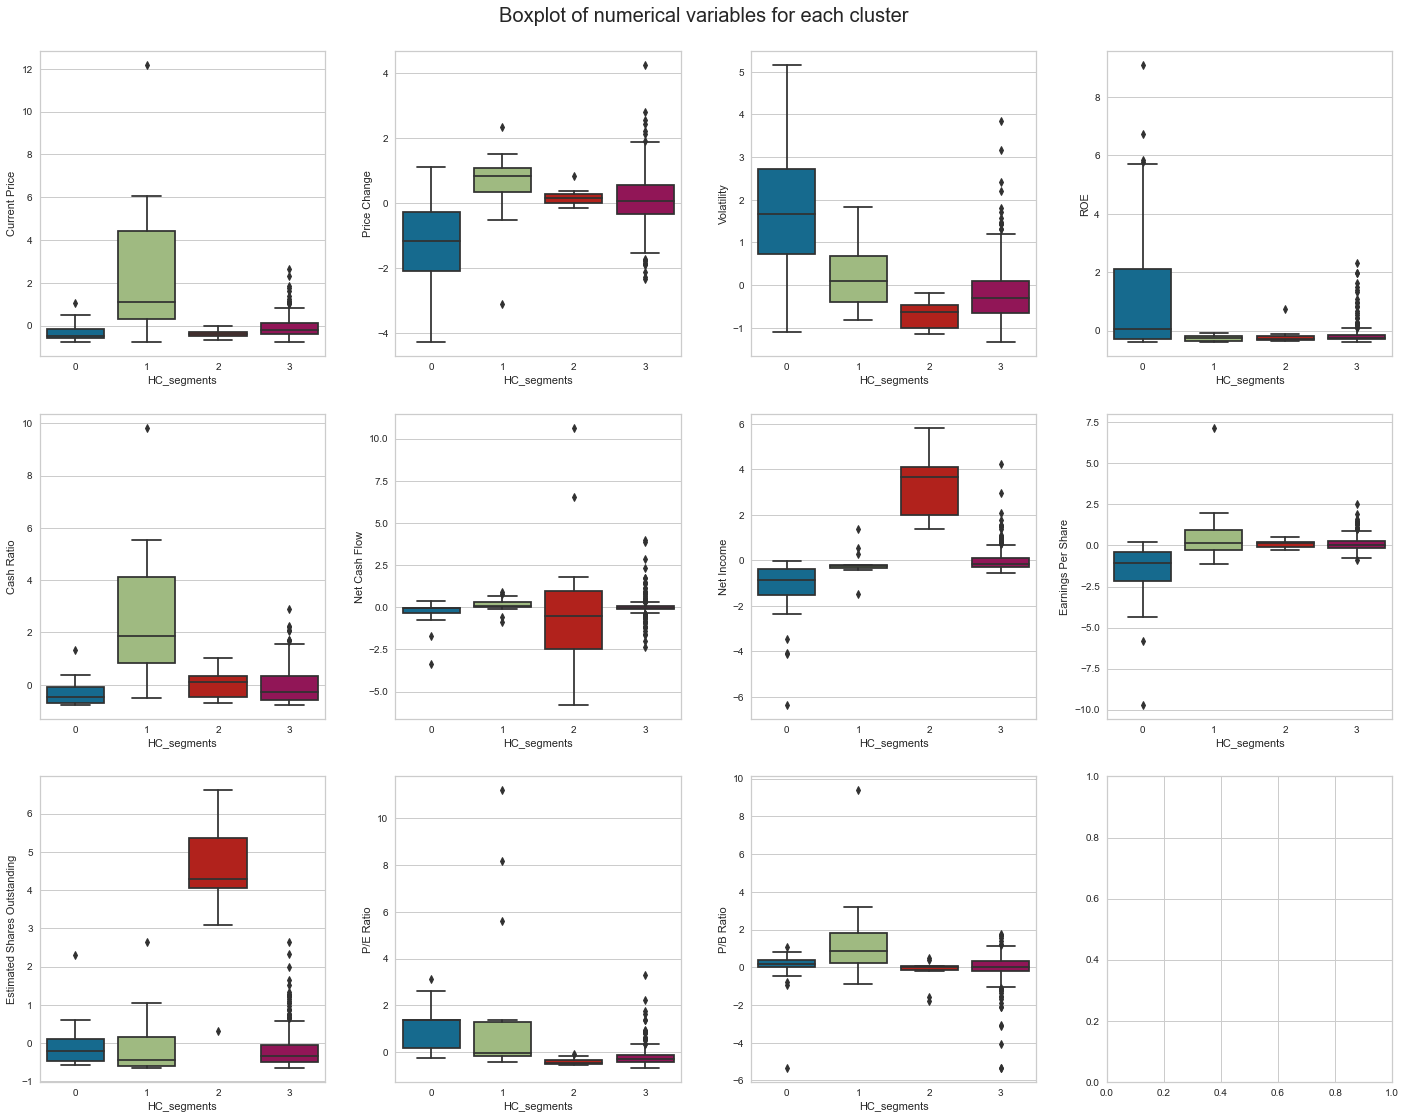

In [81]:
fig, axes = plt.subplots(3, 4,  figsize=(20, 16))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(3):
    for jj in range(4):
        if counter <11:
            sns.boxplot(ax=axes[ii, jj],y=subset_scaled_df[num_cols[counter]],x=subset_scaled_df["HC_segments"])
        counter = counter+1

fig.tight_layout(pad=2.0)

#### Observations:

**Cluster 0**
- Has about 29 different securities
- This cluster has securities with low to moderate Current Price of 48 dollars
- cluster has securities with very low Cash Ratio of 40.27, negative earnings per share of -8.69 and negative P/B_Ratio of -2.6

**Cluster 1**

- Has about 11 different securities
- This cluster has securities with among the lowest average Current Price of 42.8dollars and low average Price Change of 6.2
- Cluster has securities with among the lowest volatility of 1.1, making them less riskier
- Cluster also has the less Cash Ratio of 71,high Net Income of 14631272727.27 of avg Earnings Per Share 3.4

**Cluster 2**

- Has the securities at 15
- This cluster has securities that lie in between Cluster 0 & Cluster 1 
- Intermediate Current Price of 326.198218 dollars
- Intermediate Price Change of 10.563242, and intermediate volatility

**Cluster 3**

- Has most number of  securities 285
- Has securities with some of the highest average Net Income of 1538594322.807018 
- Has securities with some of the highest Estimated Shares Outstanding of 446472132.228456


# K-Means vs Hierarchical clustering

In [82]:

pd.crosstab(df1.KM_segments, df2.HC_segments).style.highlight_max(color="lightgreen", axis=0)

HC_segments,0,1,2,3
KM_segments,,,,
0,6,0,0,271
1,0,0,10,1
2,23,1,0,3
3,0,14,1,10


**Observations**
- 4 clusters are identified by both clusters.
- 23+14+10+271 ie 318 securities of 340 are identical.

# Observations based on clustering profiles


- The appropriate value of k from the elbow curve seems to be 4,5 or 6
- Silhouette score shows that 4 is a good number of clusters
- Cluster 0 is safer, has containing more exclusive securities for k- mean
- Cluster 0 and 1 has better performance for k- mean
- Cluster 3 and 2 is not safe for k- mean
- Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.
- We see that the cophenetic correlation is maximum with average linkage
- The cophenetic correlation is highest for average (0.94) and centroid linkage methods (0.93).
- 6 appears to be the appropriate number of clusters from the dendrogram for average linkage.
- Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before).


## Dimensionality Reduction using PCA for visualization

- Let's use PCA to reduce the data to two dimensions and visualize it to see how well-separated the clusters are.

In [83]:
# importing library
from sklearn.decomposition import PCA

# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(hc_df)
reduced_df_pca = pd.DataFrame(
data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

In [84]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

0.36783747877921735

**Observations**
- The first two principal components explain 36.7% of the variance in the data.

### Scatterplot by cluster labels - K-Means Clustering

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

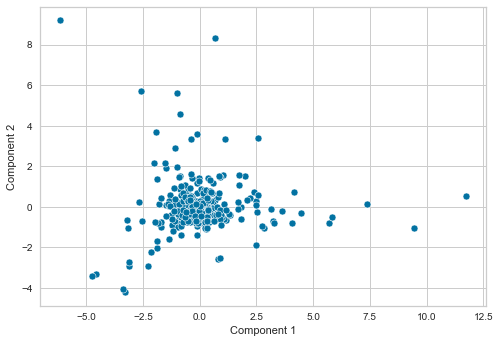

In [85]:
sns.scatterplot(data=reduced_df_pca, x="Component 1", y="Component 2")

**Observations**
- We can kind of see one broad clusters 
- There a few outlier points too.


### Scatterplot by cluster labels - HierarchicalClustering

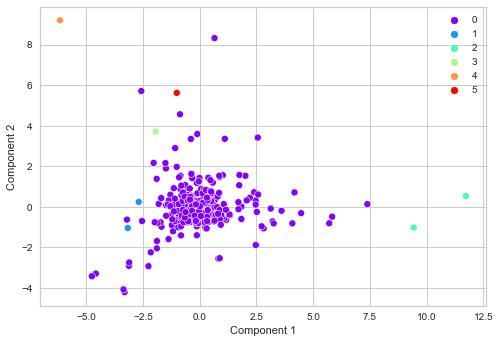

In [86]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=hc_df["HC_segments"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

**Observations**
- Cluster 0 contains majority of data points 
- The rest of the data points seem to be mostly outliers.
- There is more similarities between K-Means clustering & Hierarchical clustering

## Clustering Profile observations:
- Out of 340 securities in data set,  318 securities in a similar fashion with 22 securities being clustered differently. 
- One cluster was identified as high performing.
- PCA performed for both clustering techniques yielded similar cluster densities 
- Health care and IT has high performance.

 # Conclusion and Business Recommendations
- Securities are grouped to 4 different clusters based on high low performance.

- Dividing them to different clusters helps to increase earnings in all conditions.

- Stocks are volatile so cannot predict the future based on past performances.

- There is movement of data across the clusters depending on market conditions, so we need better predictions and analysis.

- Since more data is added everyday more predictions and analysis is needed.
